# Telecom Churn: Exploratory Data Analysis

## Imports

In [1]:
import geopandas as gpd
from mizani.formatters import * # this has various scales
import numpy as np
import pandas as pd
import pickle
from plotnine import *
import plotnine
import plydata.cat_tools as cat
import warnings

plotnine.options.figure_size = (20, 10)
warnings.filterwarnings("ignore")

## Load Data

In [2]:
telecom_df = pickle.load(open("data_clean/telecom_data.pkl", "rb"))
telecom_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,set
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [3]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 666
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   f

## Metadata
Definitions for each variables to provide context

* **state:** US state where the user is located
* **account_length:** Some undefined time unit for length of account history
* **area_code:** area code where the user is located
* **international_plan:** Whether or not the user has an international plan
* **voice_mail_plan:** Whether or not the user has a voice mail plan
* **number_vmail_messages:** Number of voice mail messages in the users inbox
* **total_day_minutes:** Total day time minutes of the uesr's calls
* **total_day_calls:** Total number of day time calls made by the user
* **total_day_charge:** Total day time monetary charge based on the user's calls
* **total_eve_minutes:** Total evening time minutes of the uesr's calls
* **total_eve_calls:** Total number of evening time calls made by the user
* **total_eve_charge:** Total evening time monetary charge based on the user's calls
* **total_night_minutes:** Total night time minutes of the uesr's calls
* **total_night_calls:** Total number of night time calls made by the user
* **total_night_charge:** Total night time monetary charge based on the user's calls
* **total_intl_minutes:** Total minutes of the uesr's international calls
* **total_intl_calls:** Total number of international calls made by the user
* **total_intl_charge:** Total charge based on the users international calls
* **customer_service_calls:** Total number of calls made to customer service
* **churn:** Whether or not the user ended their account
* **set:** Training/Test set

## Data Exploration

In [14]:
telecom_df.describe().transpose().drop("count", axis = 1)

,mean,std,min,25%,50%,75%,max
account_length,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


Again, the 5-number summaries for numeric variables look good.

### Correlation

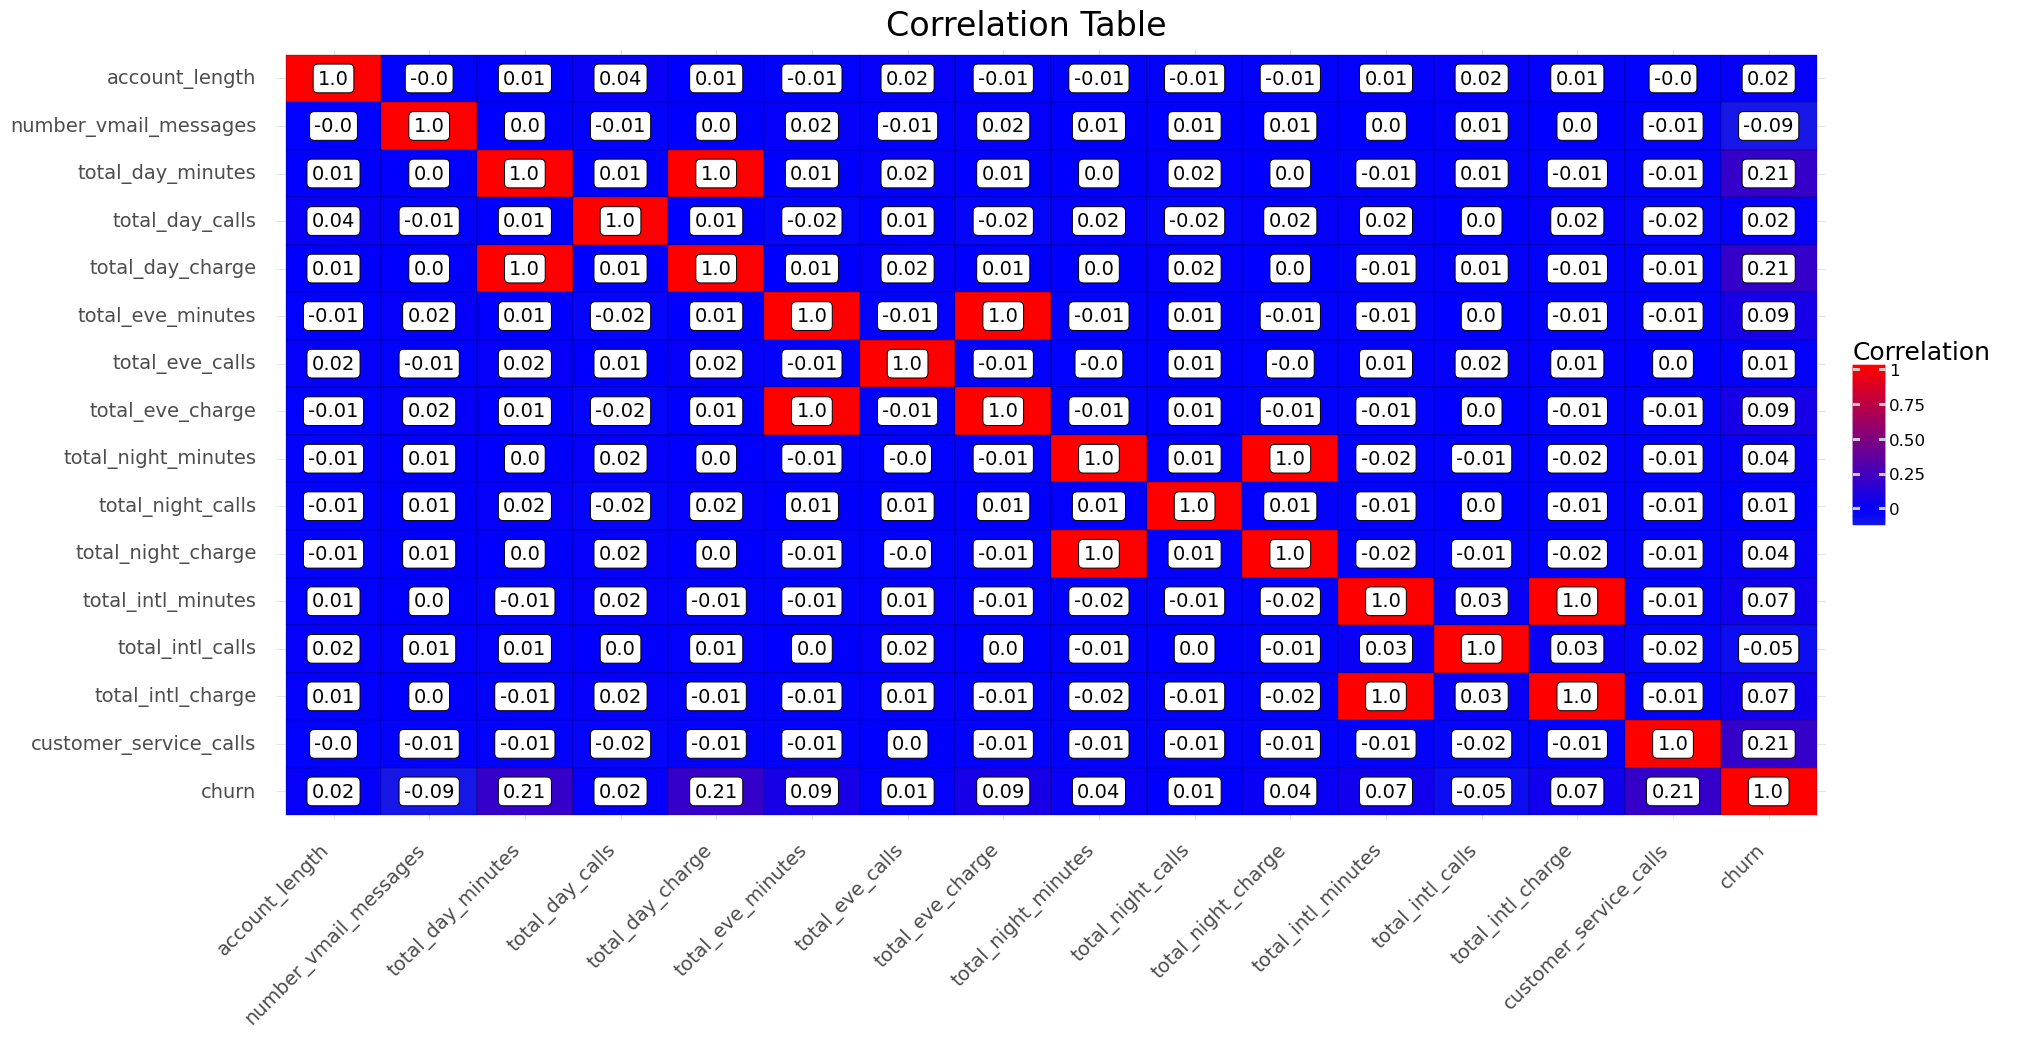

<ggplot: (122481407934)>

In [15]:
df_corr = telecom_df.corr().\
    melt(ignore_index = False).\
    reset_index().\
    set_axis(labels = ["var1", "var2", "value"], 
             axis = 1).\
    assign(lab_text = lambda x: np.round(x.value, 2)).\
    assign(var1 = lambda x: cat.cat_inorder(x.var1),
           var2 = lambda x: cat.cat_rev(cat.cat_inorder(x.var2)))

(ggplot(df_corr, aes(x = "var1", y = "var2", fill = "value", label = "lab_text")) + 
 geom_tile(color = "black") +
 geom_label(fill = "white", size = 14) +
  scale_fill_gradient2(low = "yellow", mid = "blue",  high = "red", midpoint = 0)+ 
 labs(title = "Correlation Table", 
     x = "", 
     y = "", 
     fill = "Correlation") + 
 theme_minimal() + 
 theme(axis_text_x = element_text(size = 14, rotation = 45, hjust = 1), 
       axis_text_y = element_text(size = 14), 
       legend_text = element_text(size = 12), 
       legend_title = element_text(size = 18), 
       plot_title = element_text(size = 24)))

Theres a clear pattern in that every *charge* variable is perfectly correlated with its corresponding *minutes* variable. This makes sense as you are charged based on the number of minuts you spend on calls. Because they are perfectly correlated, they will both have the same correlation with *churn* as seen in the table and plot below

In [16]:
df_corr.\
    query("var1 == 'churn'").\
    query("var2.str.contains('customer_service') == False").\
    query("var2.str.contains('charge|minutes')").\
    filter(items = ["var2", "value"]).\
    rename(columns = {"var2": "input", 
                      "value": "correlation_with_churn"})

,input,correlation_with_churn
47,total_day_minutes,0.205151
79,total_day_charge,0.205151
95,total_eve_minutes,0.092796
127,total_eve_charge,0.092786
143,total_night_minutes,0.035493
175,total_night_charge,0.035496
191,total_intl_minutes,0.068239
223,total_intl_charge,0.068259


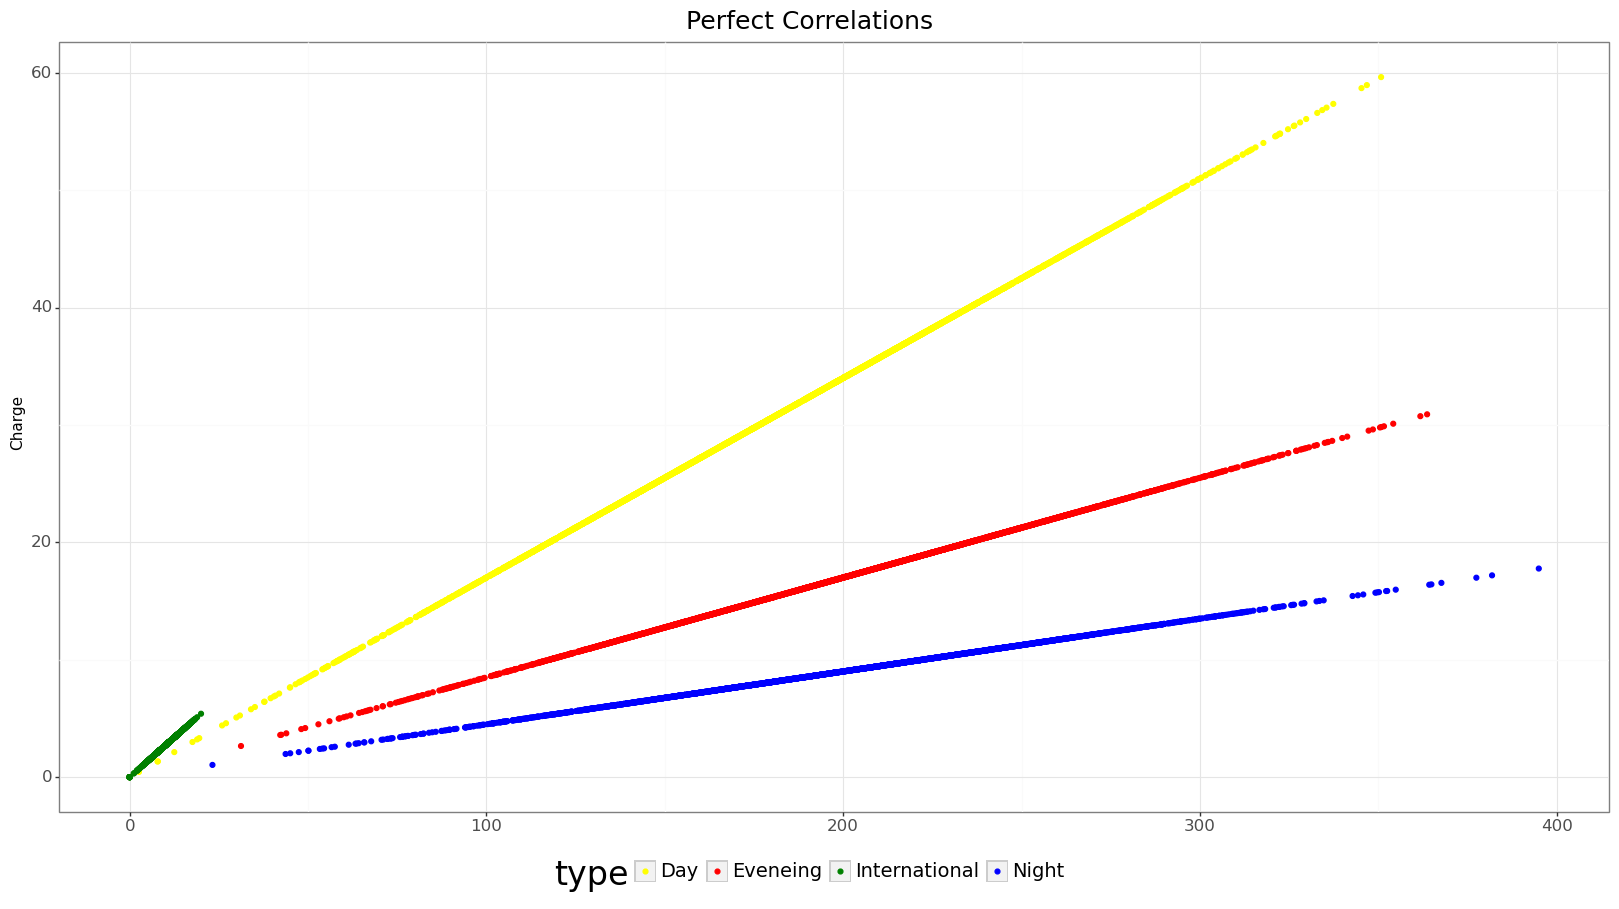

<ggplot: (122486564431)>

In [17]:
min_charge_df = pd.concat([pd.DataFrame({"type": "Day",
                                         "minutes": telecom_df.total_day_minutes,
                                         "charge": telecom_df.total_day_charge}), 
                           pd.DataFrame({"type": "Eveneing",
                                         "minutes": telecom_df.total_eve_minutes,
                                         "charge": telecom_df.total_eve_charge}), 
                           pd.DataFrame({"type": "Night",
                                         "minutes": telecom_df.total_night_minutes,
                                         "charge": telecom_df.total_night_charge}), 
                           pd.DataFrame({"type": "International",
                                         "minutes": telecom_df.total_intl_minutes,
                                         "charge": telecom_df.total_intl_charge})])

(ggplot(min_charge_df, aes(x = "minutes", y = "charge", color = "type")) + 
 geom_point() + 
 scale_color_manual(values = {"Day": "yellow", "Eveneing": "red", 
                              "Night": "blue", "International": "green"}) + 
 labs(title = "Perfect Correlations", 
      x = "Minutes", 
      y = "Charge", 
      fill = "Churn") + 
 theme_bw() + 
 guides(color = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

It isn't neccessary to include both minutes and charge so I'll remove the charge input variables when I get into pre-processing.

### Churn

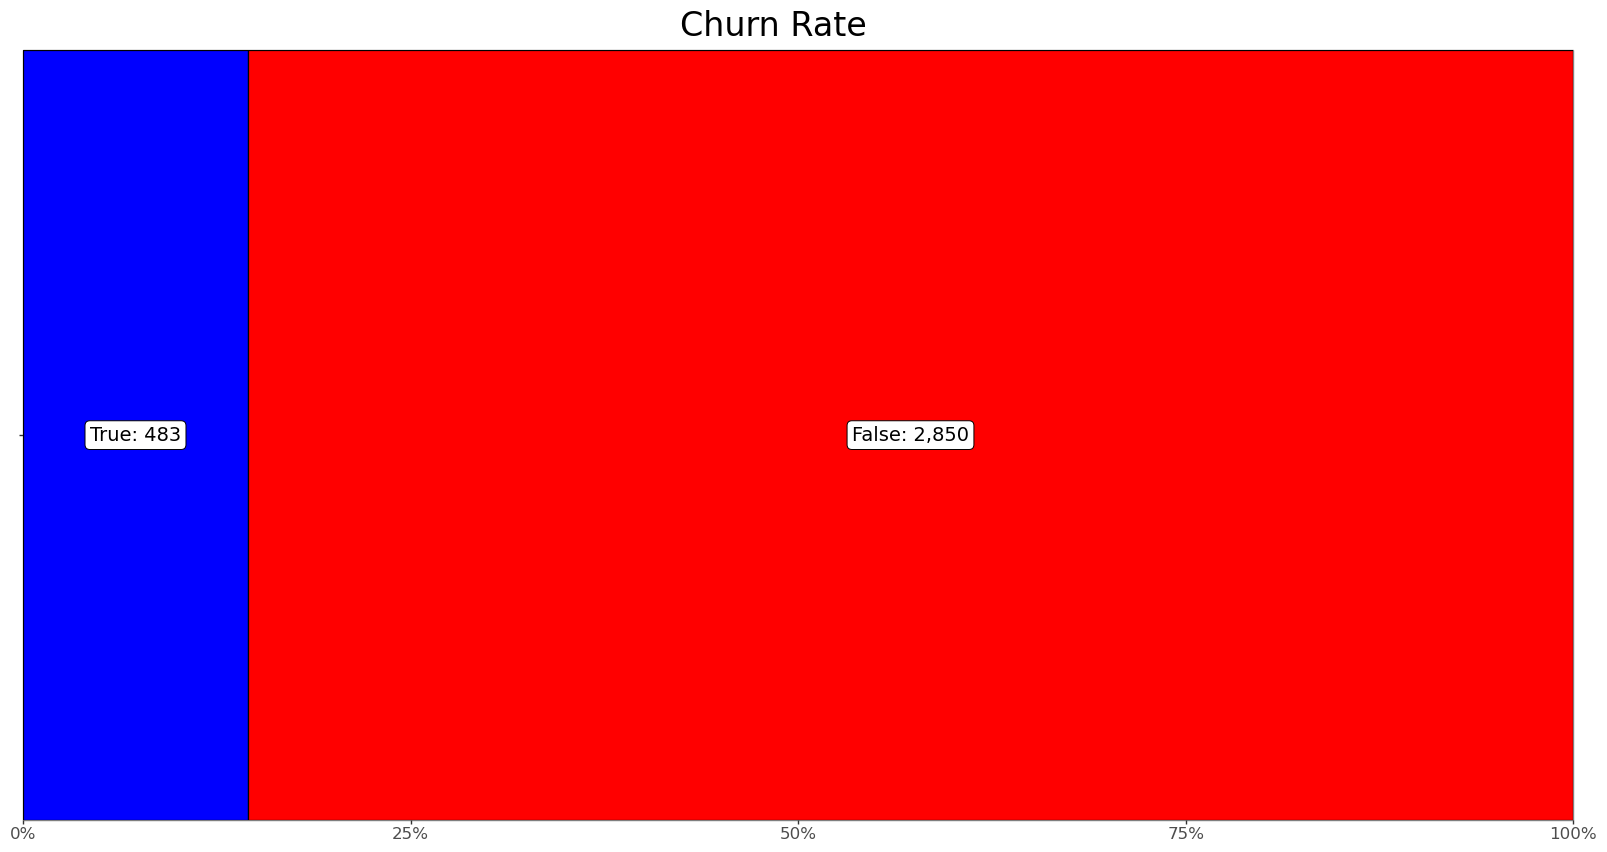

<ggplot: (122486766312)>

In [18]:
churn_df = pd.DataFrame({"user_group": "telecom_users",
                         "churn": ["False", "True"], 
                         "user_count": telecom_df.churn.value_counts()}).\
    assign(user_count_label = lambda x: (x.churn.str.title() + ": " + comma_format()(x.user_count)), 
           user_count = lambda x: x.user_count/x.user_count.sum())

lab_placement = [np.mean([1 - churn_df.user_count[0], 1]), np.mean([0, churn_df.user_count[1]])]

(ggplot(churn_df, aes(x = "user_group", y = "user_count", fill = "churn", label = "user_count_label")) + 
 geom_bar(stat = "identity", color = "black", width = 1) + 
 geom_label(aes(y = lab_placement), fill = "white", size = 14) + 
 scale_x_discrete(expand = [0,  0]) + 
 scale_y_continuous(labels = percent_format(), expand = [0, 0]) + 
 scale_fill_manual({"True": "blue", "False": "red"}, guide = guide_legend(reverse = True)) + 
 coord_flip() + 
 labs(title = "Churn Rate", 
      x = "", 
      y = "") + 
 theme_bw() + 
 theme(legend_position = "none", 
       axis_text_x = element_text(size = 12), 
      axis_text_y = element_blank(), 
      plot_title = element_text(size = 24)))

The Orange Telecom Company has a churn rate of ~14%

### State

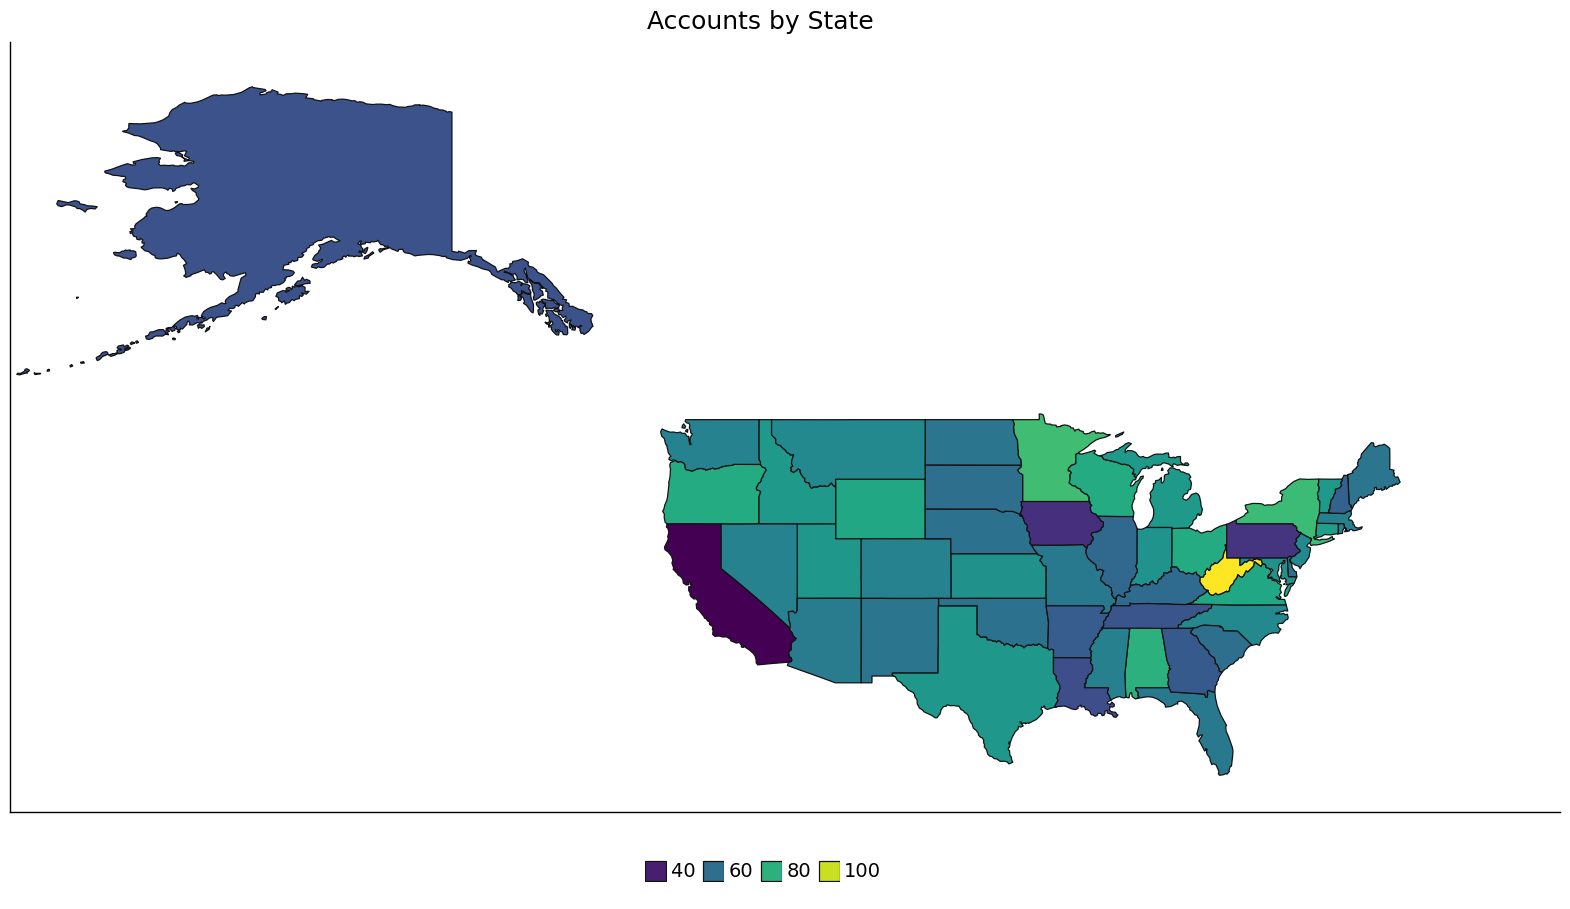

<ggplot: (122486889665)>

In [19]:
us_states_geo = gpd.read_file("other/us-states.json")

df_map = pd.DataFrame(telecom_df.state.value_counts()).\
    reset_index().\
    rename(columns = {"index": "id", 
                      "state": "count"}).\
    merge(us_states_geo, left_on="id", right_on="id")

(ggplot(df_map) + 
 geom_map(mapping = aes(fill = "count")) + 
 xlim(-170, -60) +
 ylim(25, 72) + 
 labs(title = "Accounts by State", 
      x = "", 
      y = "", 
      fill = "") + 
 theme_classic() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_blank(),
       axis_ticks = element_blank(), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

A significant portion of the userbase is located in West Virginia which is interesting considering it doesn't havea very large population. Aside from that, the rest of the state's counts gradually trail off from Minnesota (84) to California (34). There doesnt seem to be any pattern regionally in the userbase as well

### Account Length

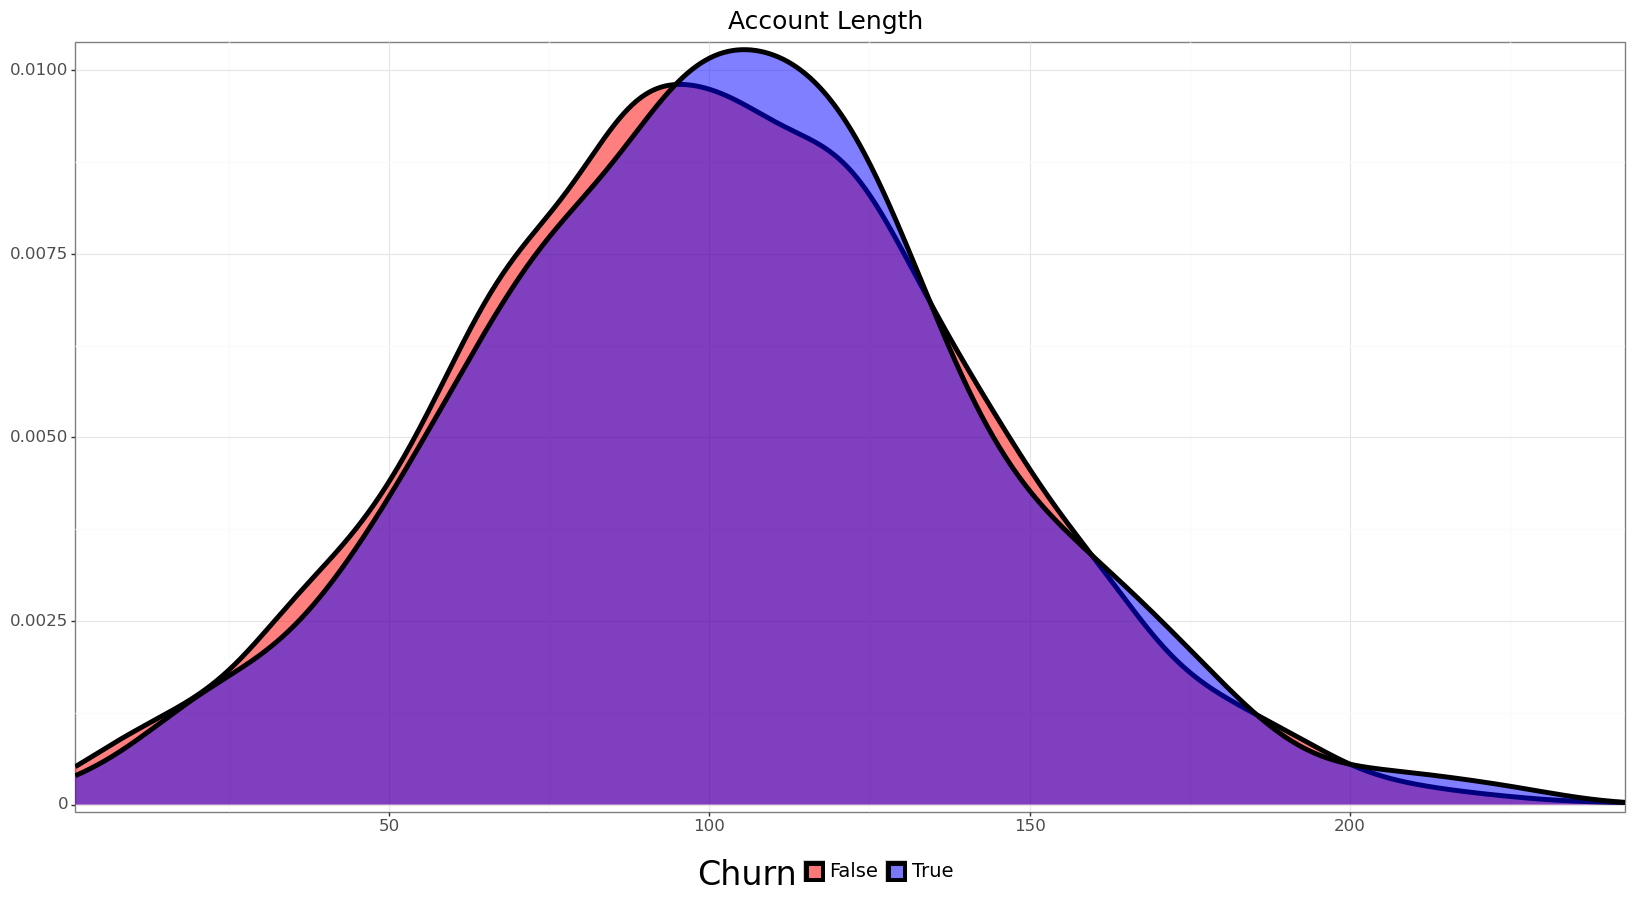

<ggplot: (122487018966)>

In [20]:
(ggplot(telecom_df, aes(x = "account_length", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Account Length", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The Account Length distributions between the two groups are both Gaussian and nearly identical

### Area Code

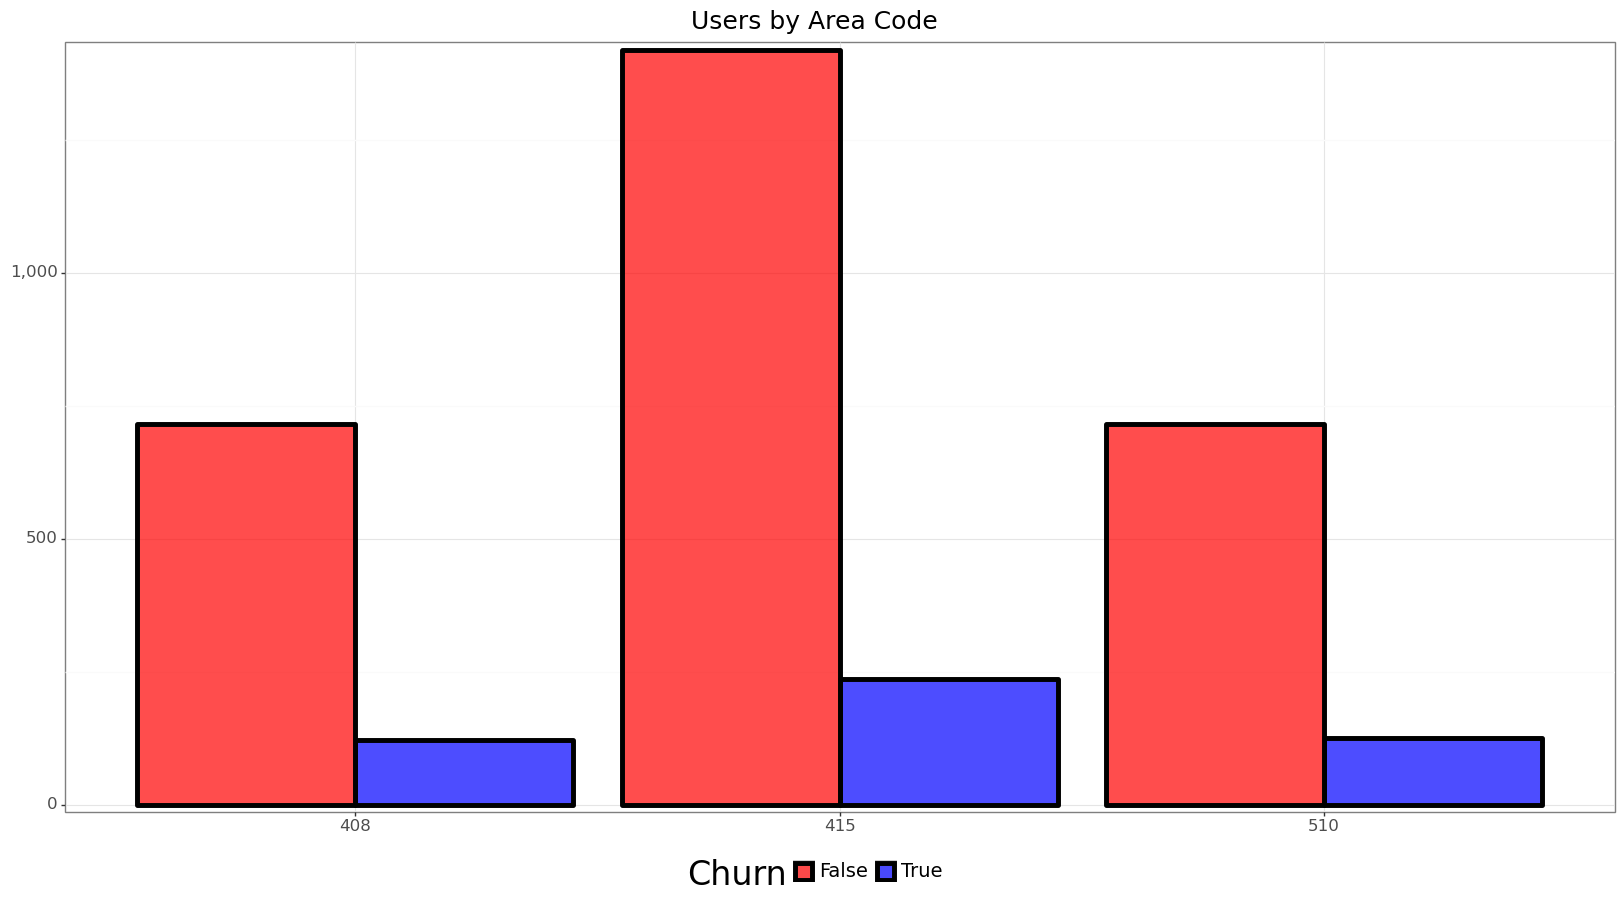

<ggplot: (122486771460)>

In [21]:
area_code_df = telecom_df[["churn", "area_code"]].\
    groupby(["churn", "area_code"]).\
    size().\
    unstack(fill_value=0).\
    reset_index().\
    melt(id_vars = "churn", value_vars = ["408", "415", "510"])


(ggplot(area_code_df, aes(x = "area_code", y = "value", fill = "churn")) + 
 geom_bar(stat = "identity", position = "dodge", color = "black", size = 2, alpha = 0.7)+ 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Users by Area Code", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() +
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

This is interesting because there are only 3 area codes and they are all in the Bay Area. 408 = San Jose, 415 = San Fransico, and 510 = East Bay. However, the users are spread out around the country, mostly in West Virginia. If I worked at a telecom company I would ask how area codes work and what the state location of the users actually means. Is this their home address? Their current location? I'm unsure what to make of this.

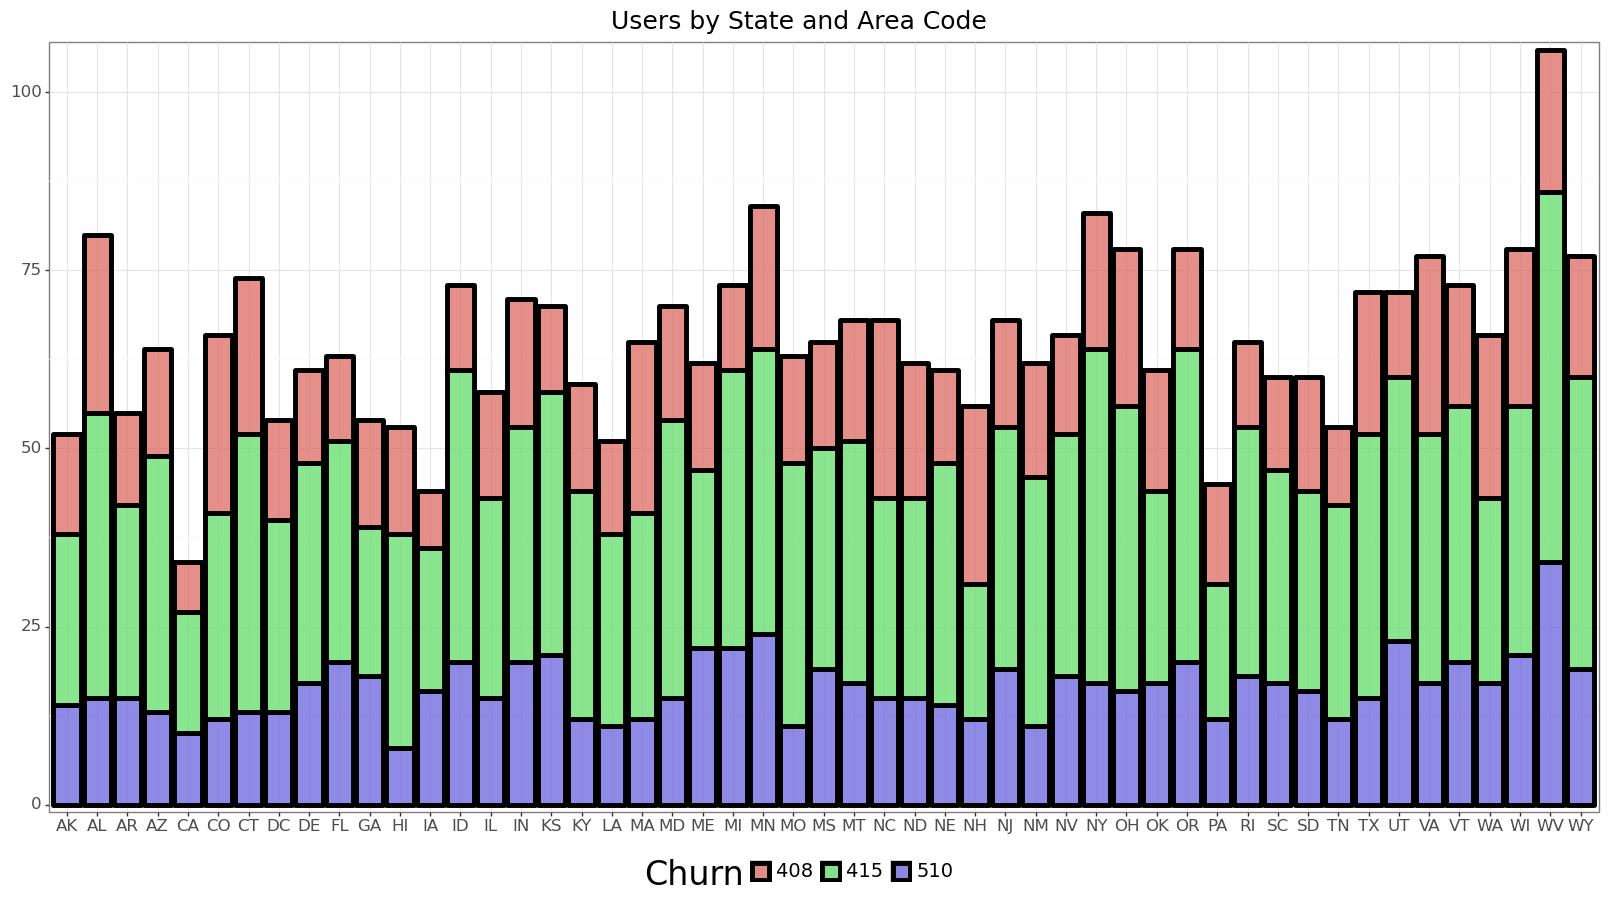

<ggplot: (122489934939)>

In [22]:
area_code_df = telecom_df[["state", "area_code"]].\
    groupby(["state", "area_code"]).\
    size().\
    unstack(fill_value=0).\
    reset_index().\
    melt(id_vars = "state", value_vars = ["408", "415", "510"]).\
    assign(area_code = lambda x: x.area_code.astype(str))

(ggplot(area_code_df, aes(x = "state", y = "value", fill = "area_code")) + 
 geom_bar(stat = "identity", color = "black", size = 2, alpha = 0.7)+ 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 labs(title = "Users by State and Area Code", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() +
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

There doesn't seem to be much of a difference between the area each state's area code. Maybe the users are located in these states, but the area codes are all Bay Area based. Even more confusing is this company is locted in France. I'll have to do more research to understand what all this means.

### International Plan

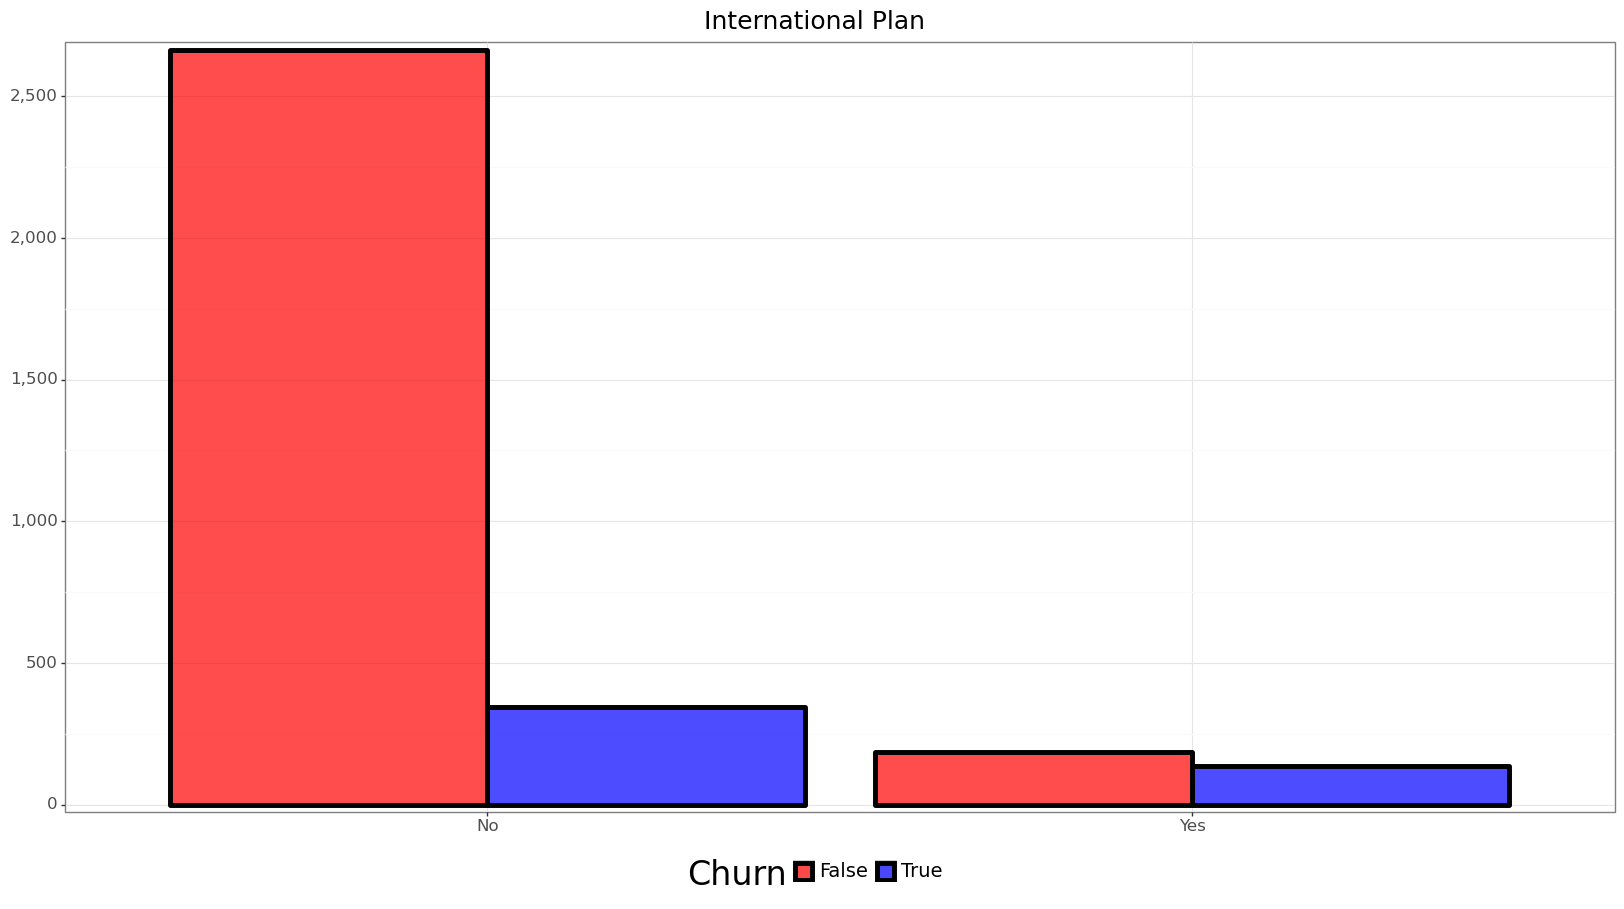

<ggplot: (122491498810)>

In [23]:
intl_df = telecom_df[["churn", "international_plan"]].\
    groupby(["churn", "international_plan"]).\
    size().\
    unstack(fill_value = 0).\
    reset_index().\
    melt(id_vars = "churn", value_vars = ["No", "Yes"])

(ggplot(intl_df, aes(x = "international_plan", y = "value", fill = "churn")) + 
 geom_bar(stat = "identity", position = "dodge", color = "black", size = 2, alpha = 0.7)+ 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "International Plan", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() +
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The churn rate of users without international plans is about 11%, however the churn rate of users with international plans is 42%. We'll see after exploring the other variables related to international calls, but it looks early on, it looks likes the problem with churn lies within the international plan 

### Voice Mail Plan

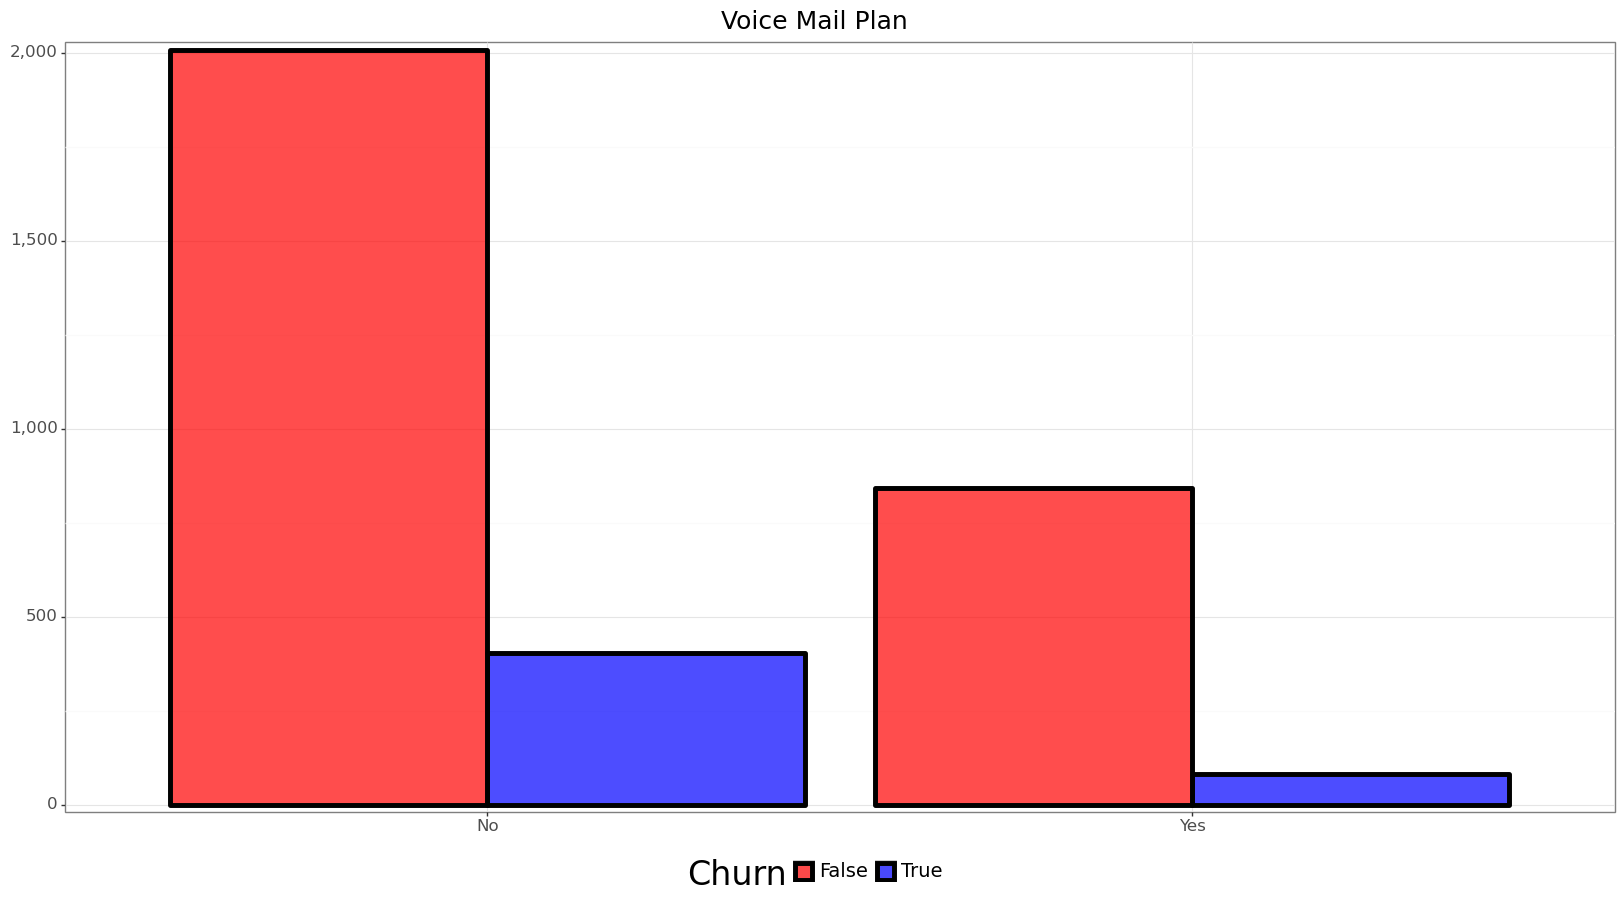

<ggplot: (122486751829)>

In [24]:
voice_df = telecom_df[["churn", "voice_mail_plan"]].\
    groupby(["churn", "voice_mail_plan"]).\
    size().\
    unstack(fill_value=0).\
    reset_index().\
    melt(id_vars = "churn", value_vars = ["No", "Yes"])

(ggplot(voice_df, aes(x = "voice_mail_plan", y = "value", fill = "churn")) + 
 geom_bar(stat = "identity", position = "dodge", color = "black", size = 2, alpha = 0.7)+ 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Voice Mail Plan", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

words

### Number VMail  Messages

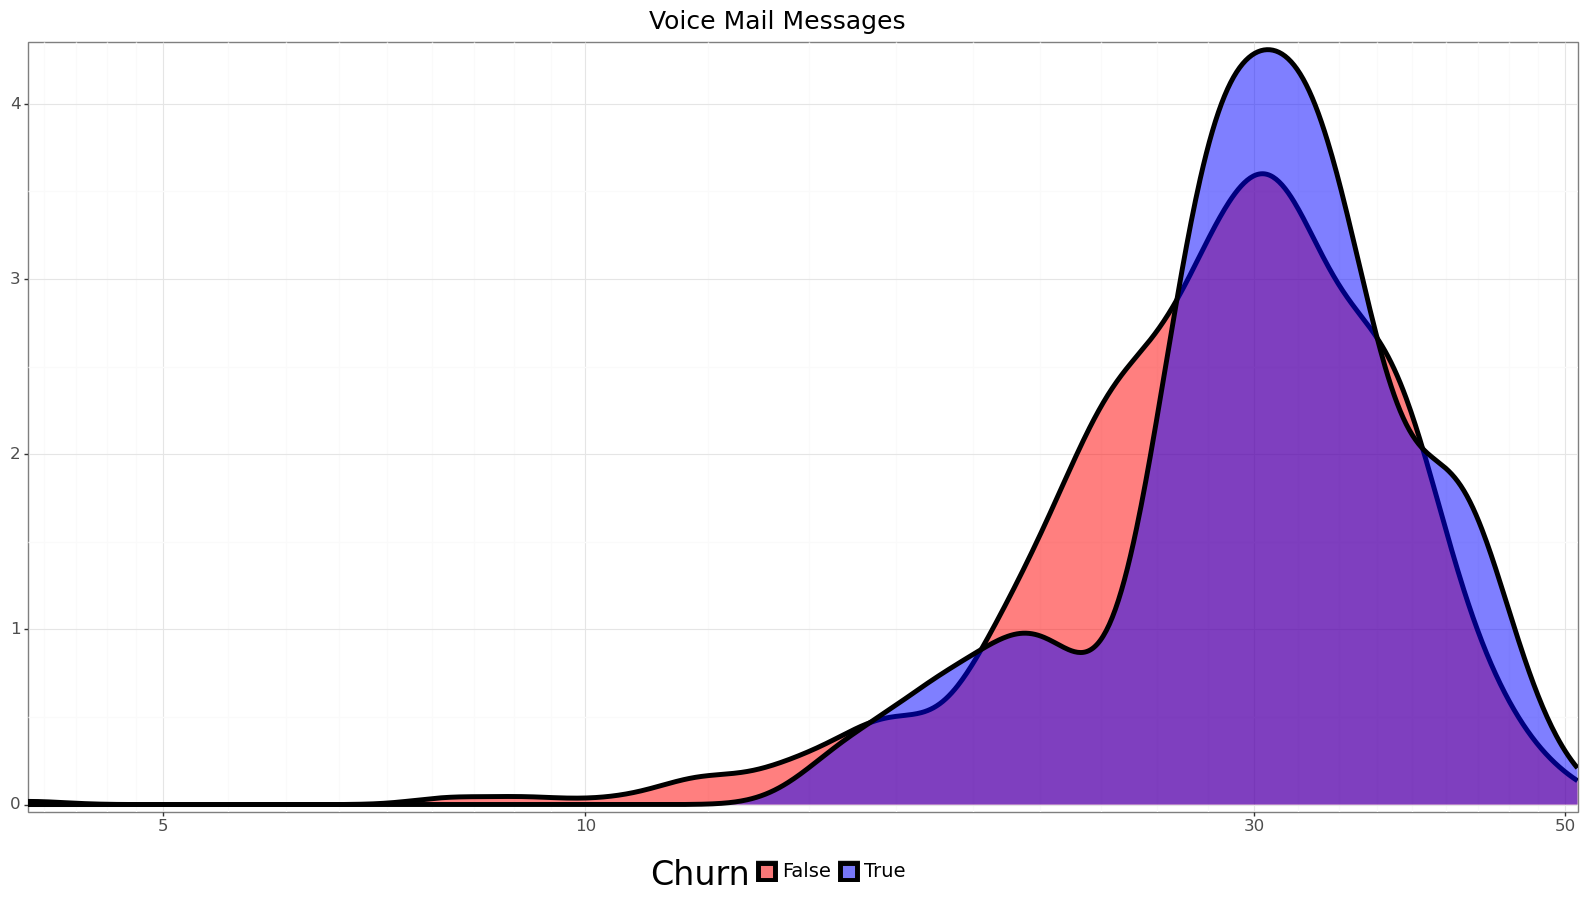

<ggplot: (122481721158)>

In [25]:
(ggplot(telecom_df, aes(x = "number_vmail_messages", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 #scale_x_continuous(expand = [0,  0]) + 
 scale_x_log10(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Voice Mail Messages", 
      x = "Log 10 Adjusted", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distribution of number of Voice Mail Meesages per account is heavily right skewed to the point where a log10 axis is requred to easily see it. The vast majority of accounts have very few if any voice mail messages while there are a few accoutns with upwards to 50. Both groups have similar distributions as well.

### Total Day Minutes

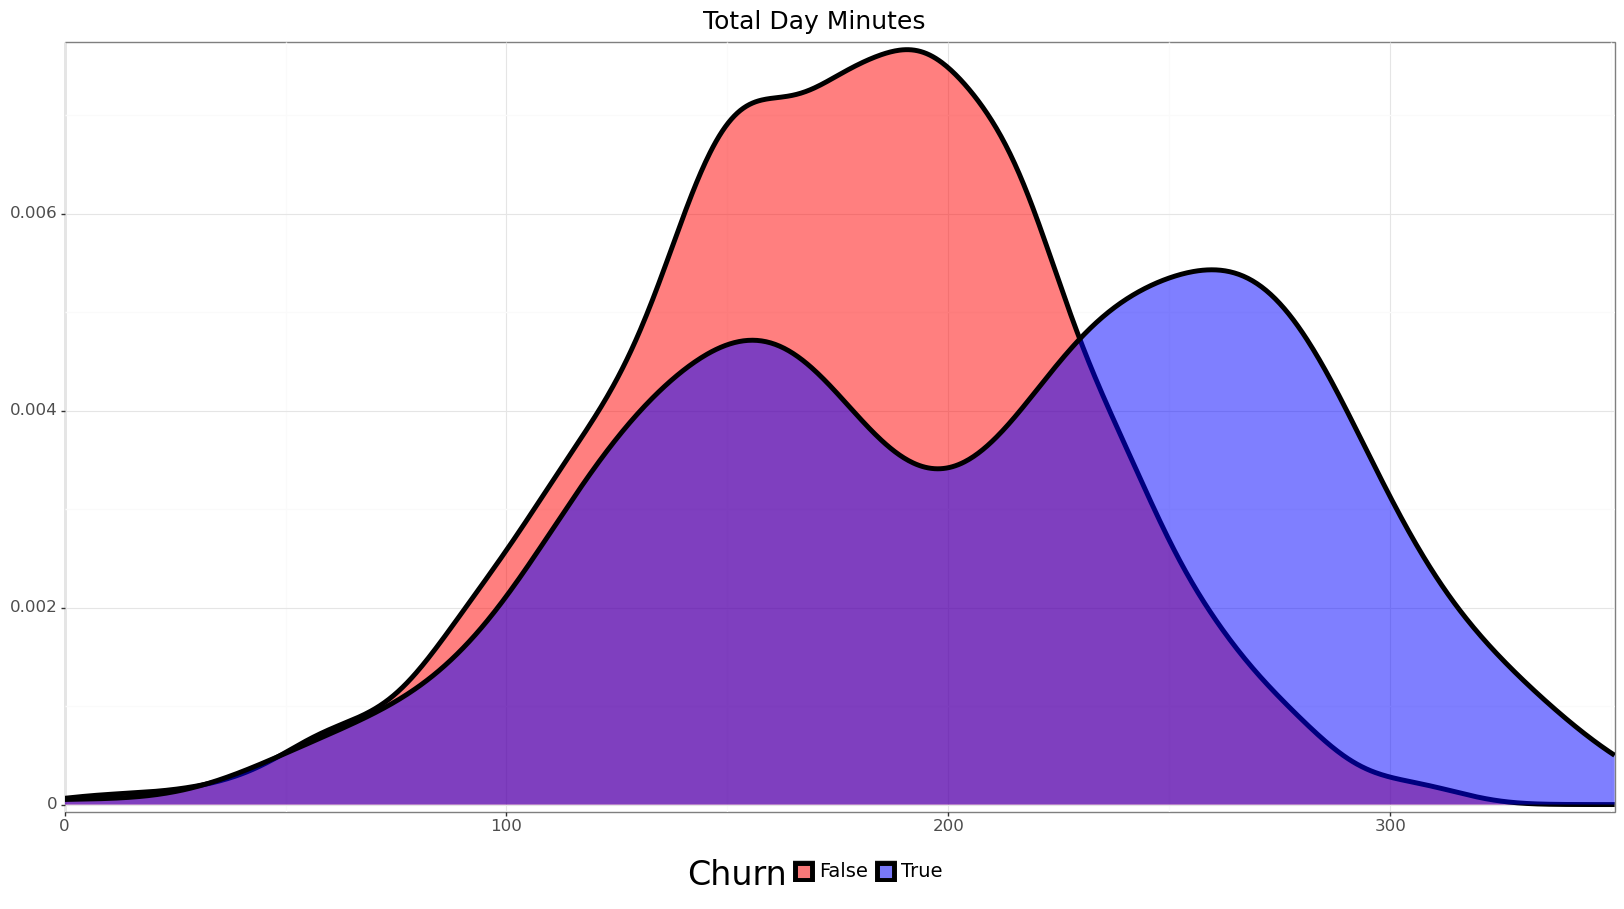

<ggplot: (122486751437)>

In [26]:
(ggplot(telecom_df, aes(x = "total_day_minutes", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Day Minutes", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distribution for day minutes for retained users is about what I expected, but the distribution for churned users is odd. There are two peaks at about 25 and 45. That peak around 45 is the higher of the two peaks for churned users and is significantly higher than the retained users at that same amount. This looks like it will be an important feature.

### Total Day Calls

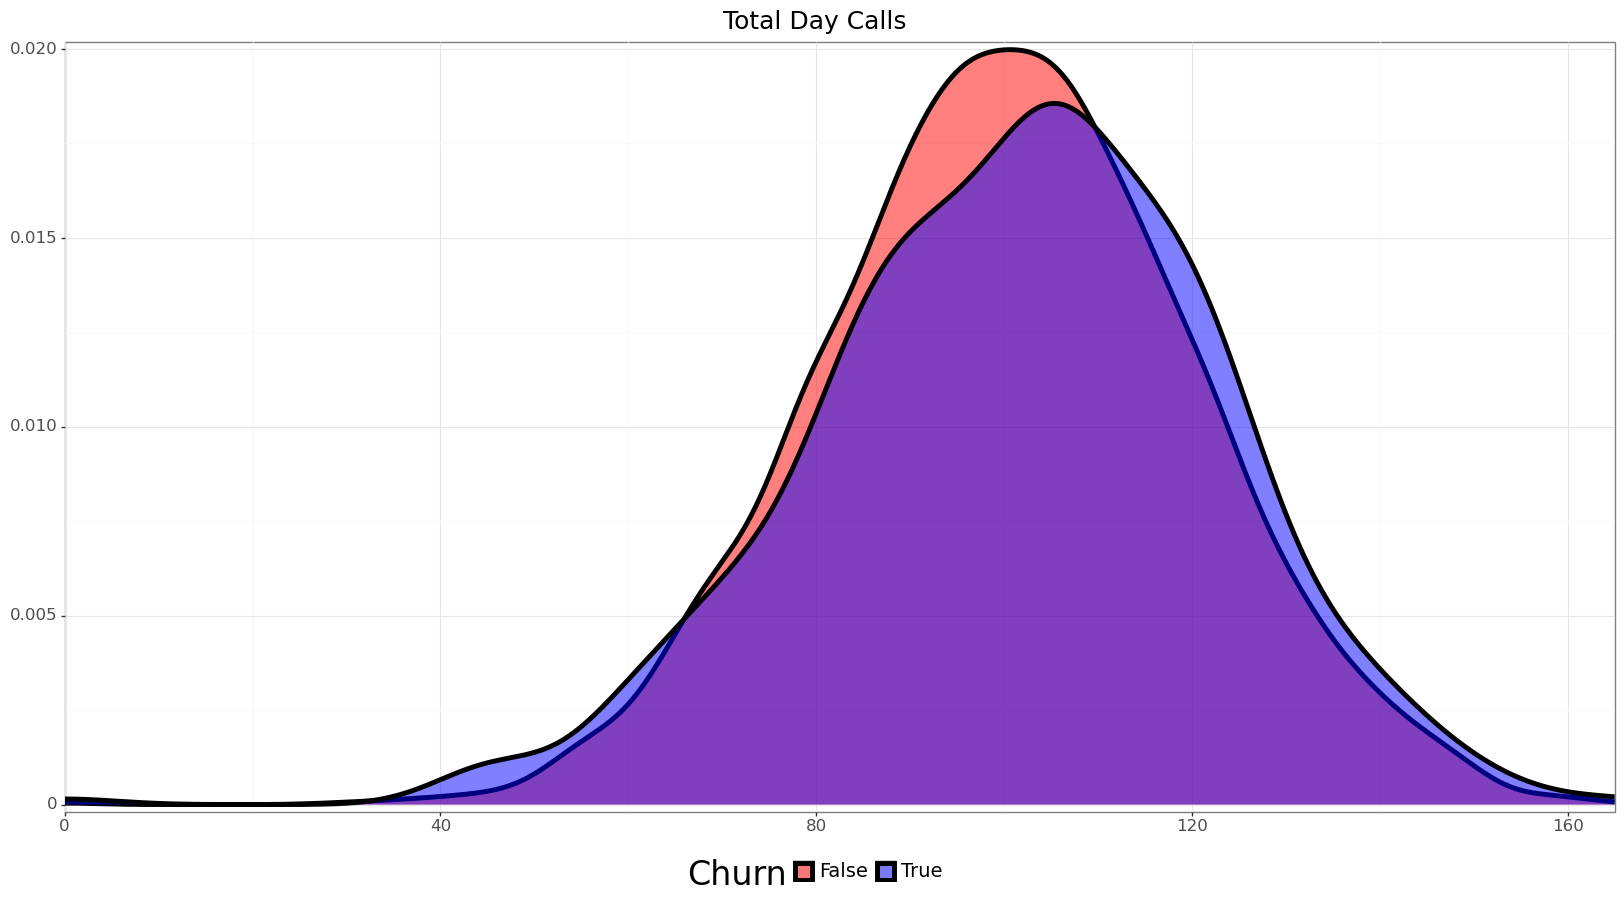

<ggplot: (122481237908)>

In [27]:
(ggplot(telecom_df, aes(x = "total_day_calls", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Day Calls", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night charge are gaussian for both groups. the churned group has a slightly lower peak with a slightly wider spread and is shifted slightly to the right.

### Total Day Charge

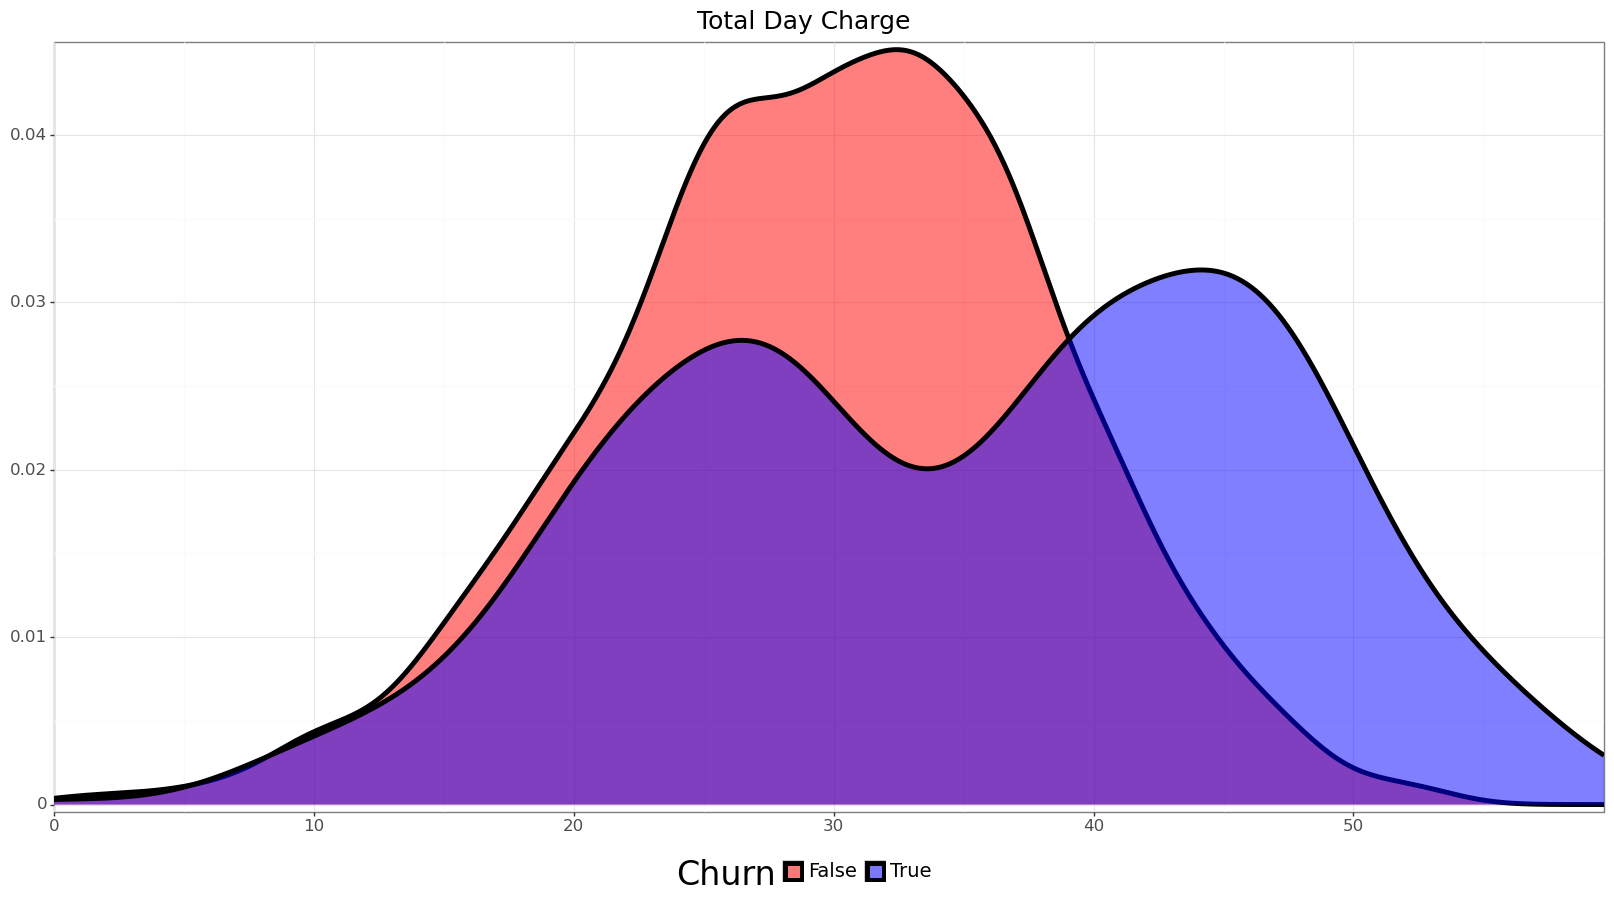

<ggplot: (122481253991)>

In [28]:
(ggplot(telecom_df, aes(x = "total_day_charge", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Day Charge", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distribution for day charge for retained users is about what I expected, but the distribution for churned users is odd. There are two peaks at about 25 and 45. That peak around 45 is the higher of the two peaks for churned users and is significantly higher than the retained users at that same amount. This looks like it will be an important feature.

### Total Evening Minutes

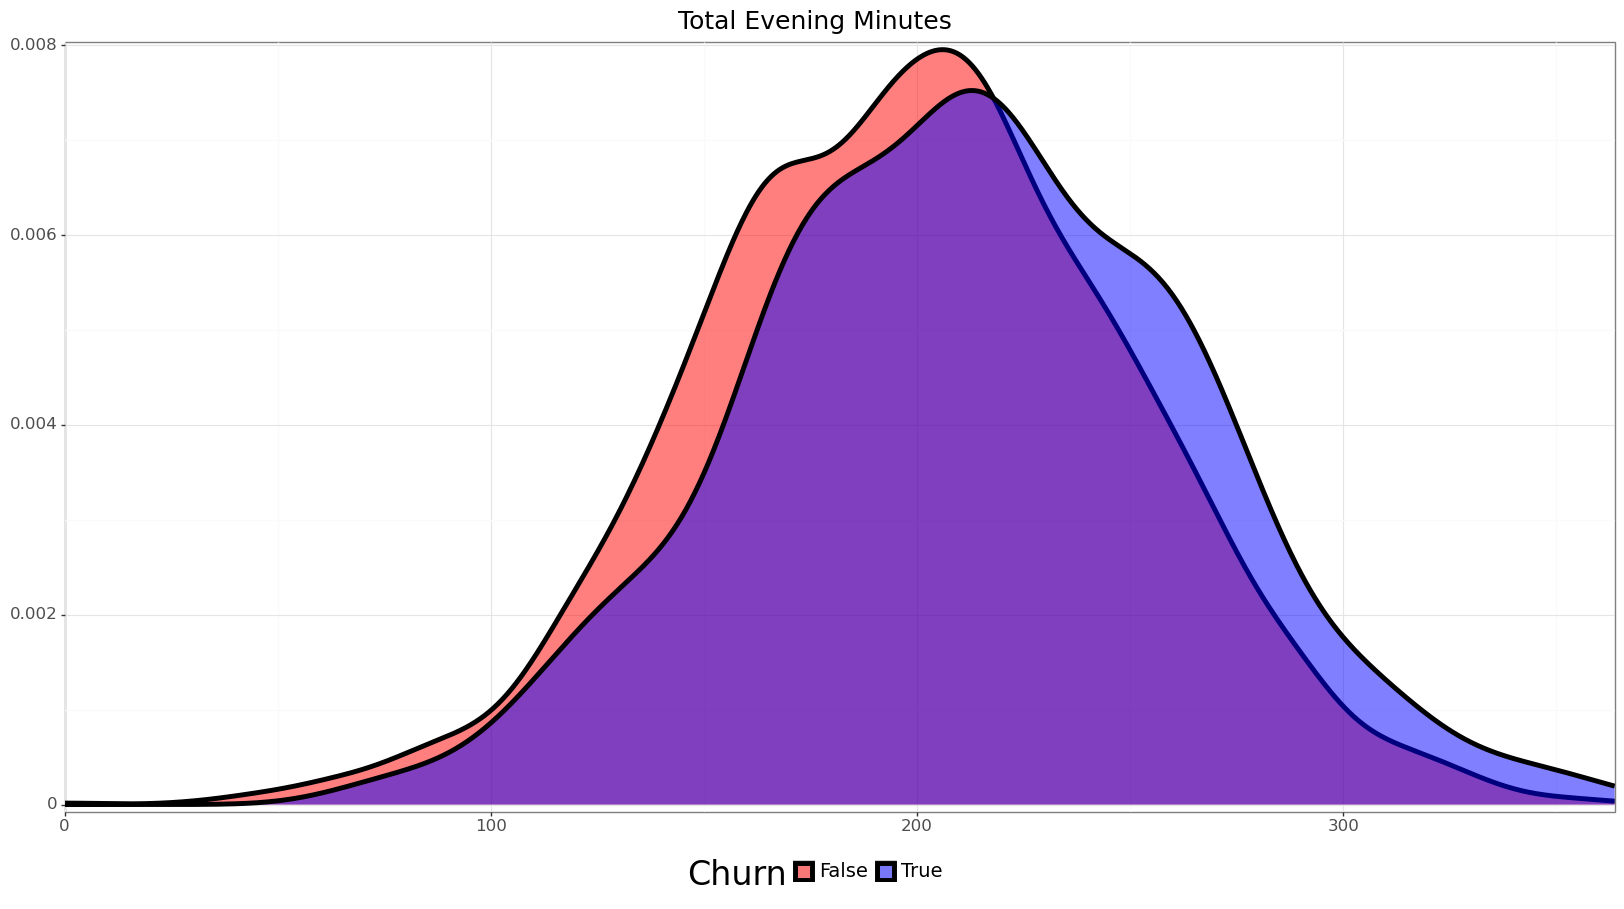

<ggplot: (122481350988)>

In [29]:
(ggplot(telecom_df, aes(x = "total_eve_minutes", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Evening Minutes", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night minutes are gaussian for both groups. However, the churned group is noticably further to the right meaning they had higher minutes during the evening time.

### Total Evening Calls

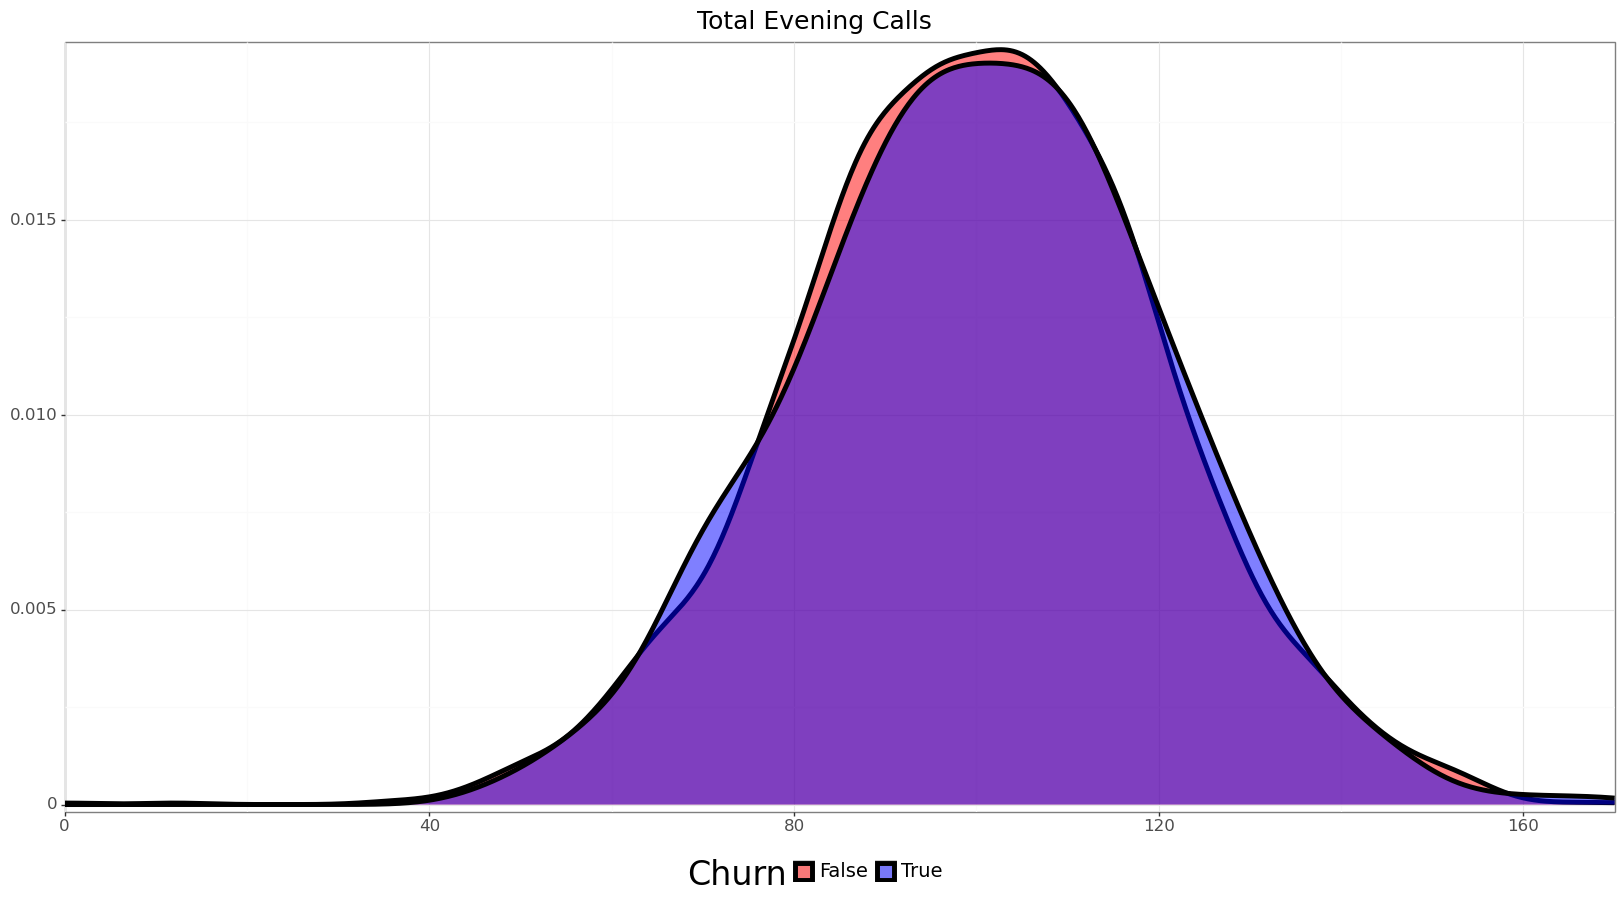

<ggplot: (122491501623)>

In [30]:
(ggplot(telecom_df, aes(x = "total_eve_calls", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Evening Calls", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night charge are gaussian for both groupsand nearly identical. Not much else to say here.

### Total Evening Charge

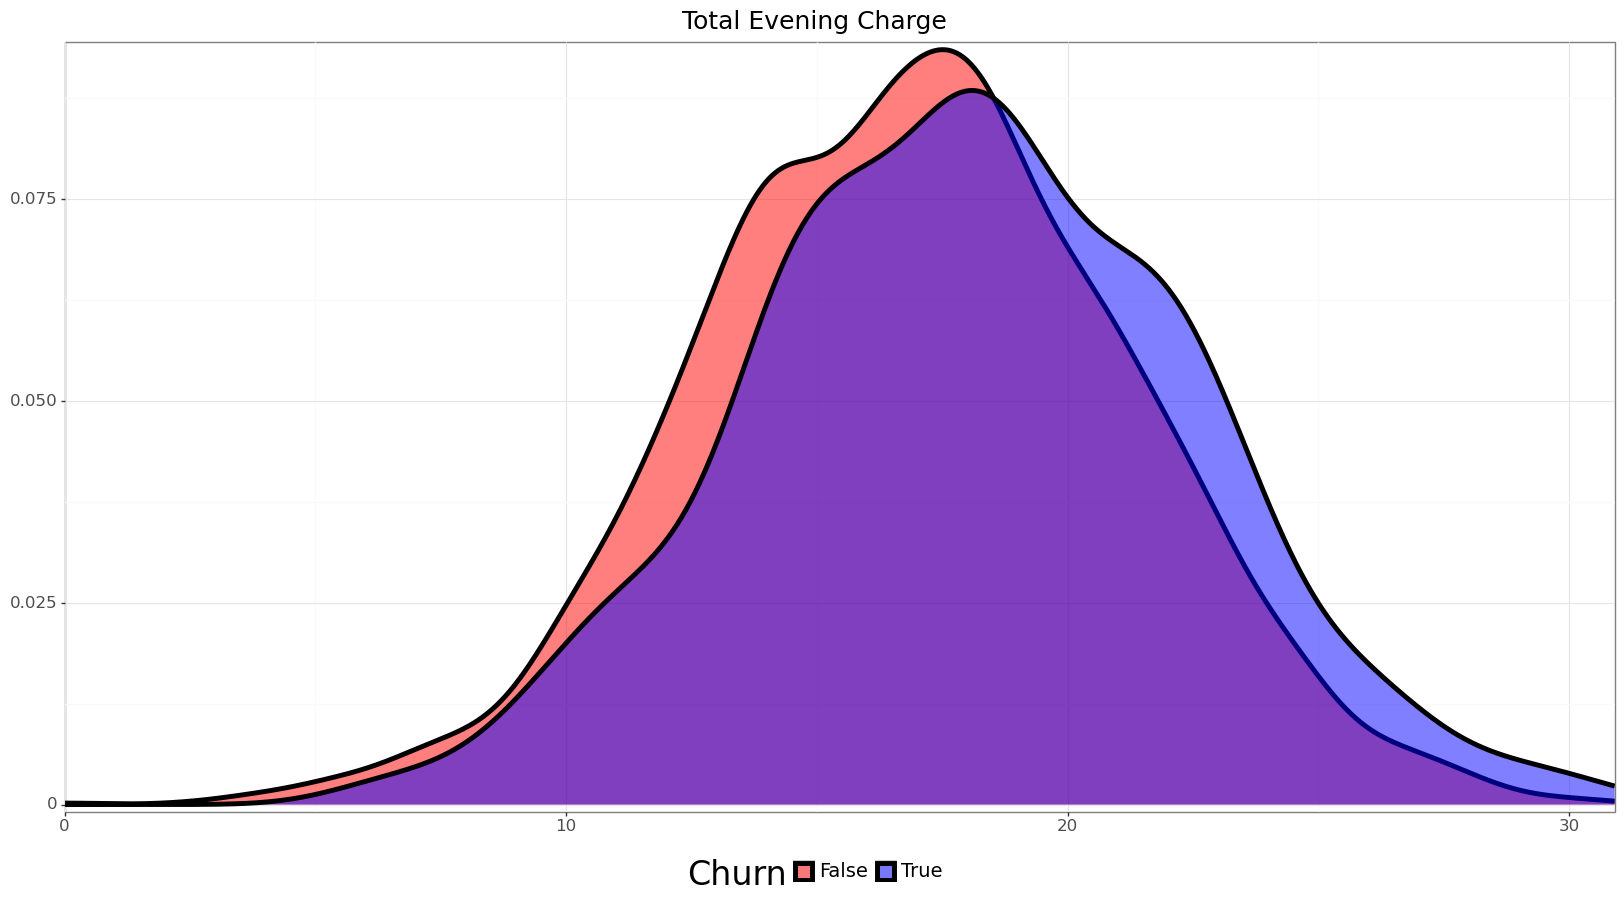

<ggplot: (122481326481)>

In [31]:
(ggplot(telecom_df, aes(x = "total_eve_charge", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Evening Charge", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night charge are gaussian for both groups. However, the churned group is noticably further to the right meaning they had higher charge during the evening time.

### Total Night Minutes

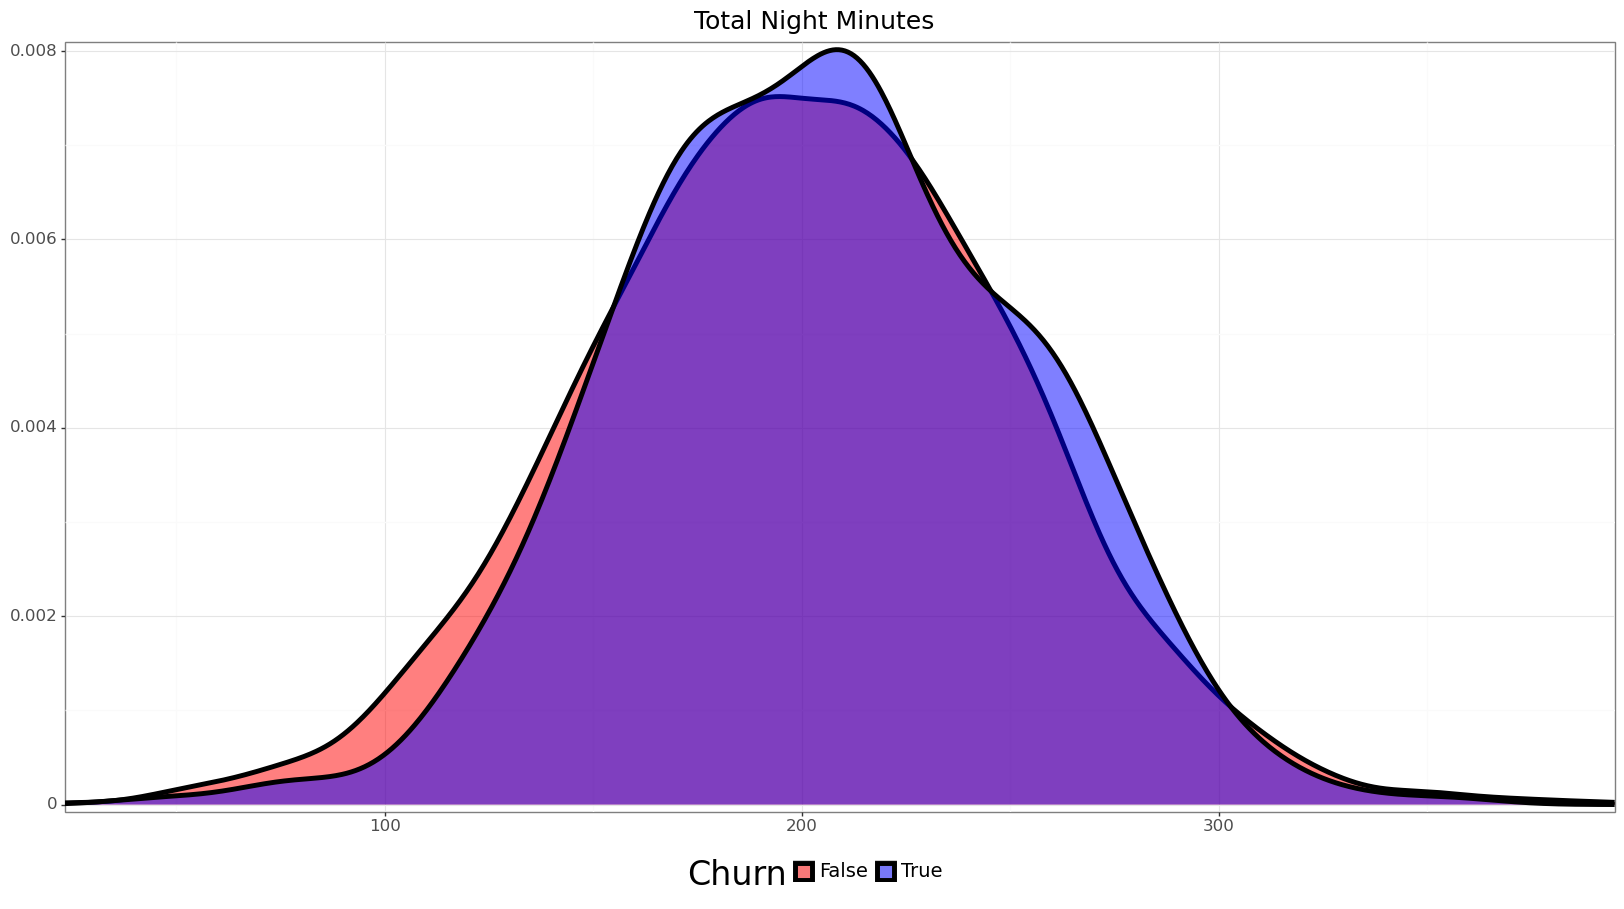

<ggplot: (122491024701)>

In [32]:
(ggplot(telecom_df, aes(x = "total_night_minutes", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Night Minutes", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night minutes are gaussian for both groups and nearly identical. The churned group has a higher peak at just below 10 and leans ever so slightly to the right as well.

### Total Night Calls

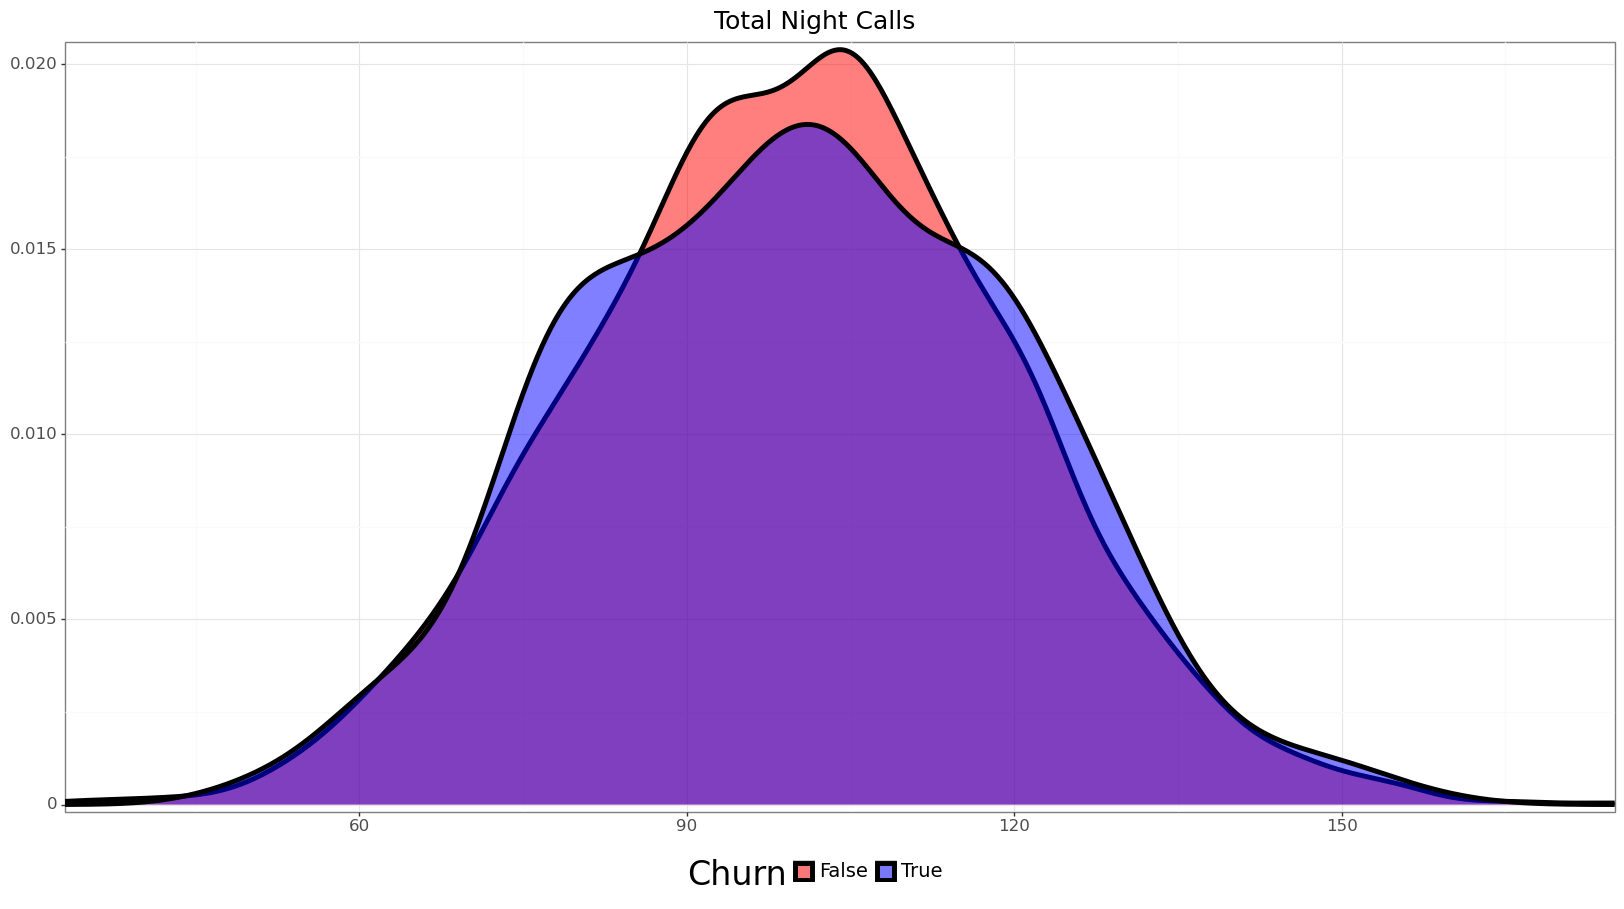

<ggplot: (122491026378)>

In [33]:
(ggplot(telecom_df, aes(x = "total_night_calls", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Night Calls", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night charge are gaussian for both groups. The churned group has a lower peak and a wider spread within about the 1st and 3rd quartiles.

### Total Night Charge

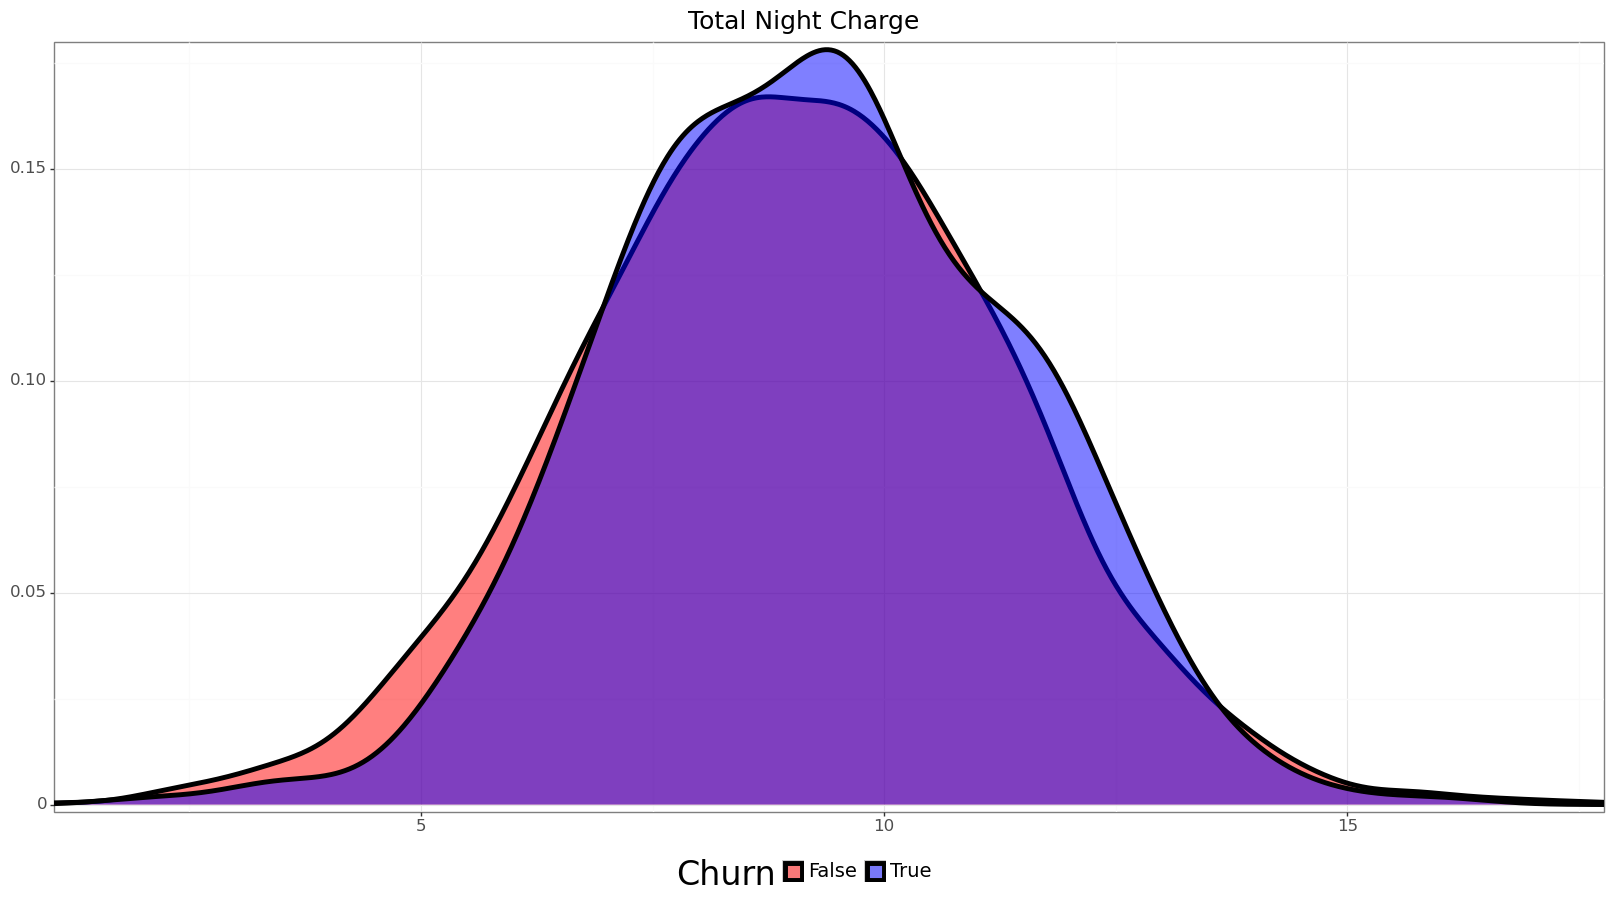

<ggplot: (122481569738)>

In [34]:
(ggplot(telecom_df, aes(x = "total_night_charge", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total Night Charge", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The distributions for night charge are gaussian for both groups and nearly identical. The churned group has a higher peak at just below 10 and leans ever so slightly to the right as well.

### Total International Minutes

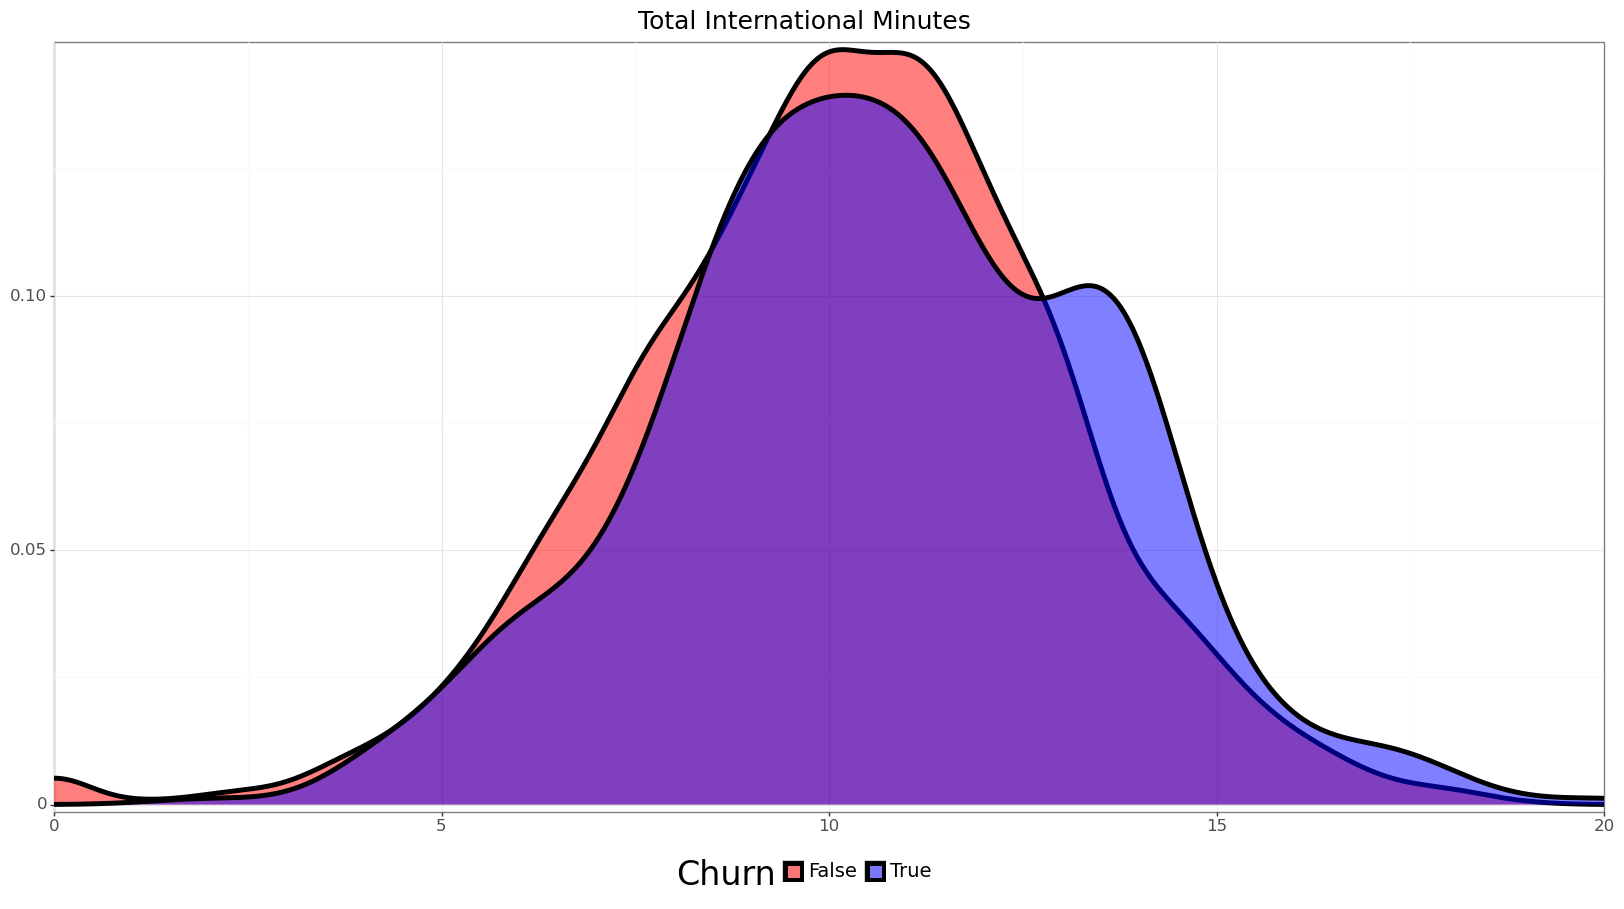

<ggplot: (122481880992)>

In [35]:
(ggplot(telecom_df, aes(x = "total_intl_minutes", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total International Minutes", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

Distributions for both groups are Gaussian exceped the churned group has a bit ot a wider spread to the right. Churned users have a slightly higher minutes.

### Total International Calls

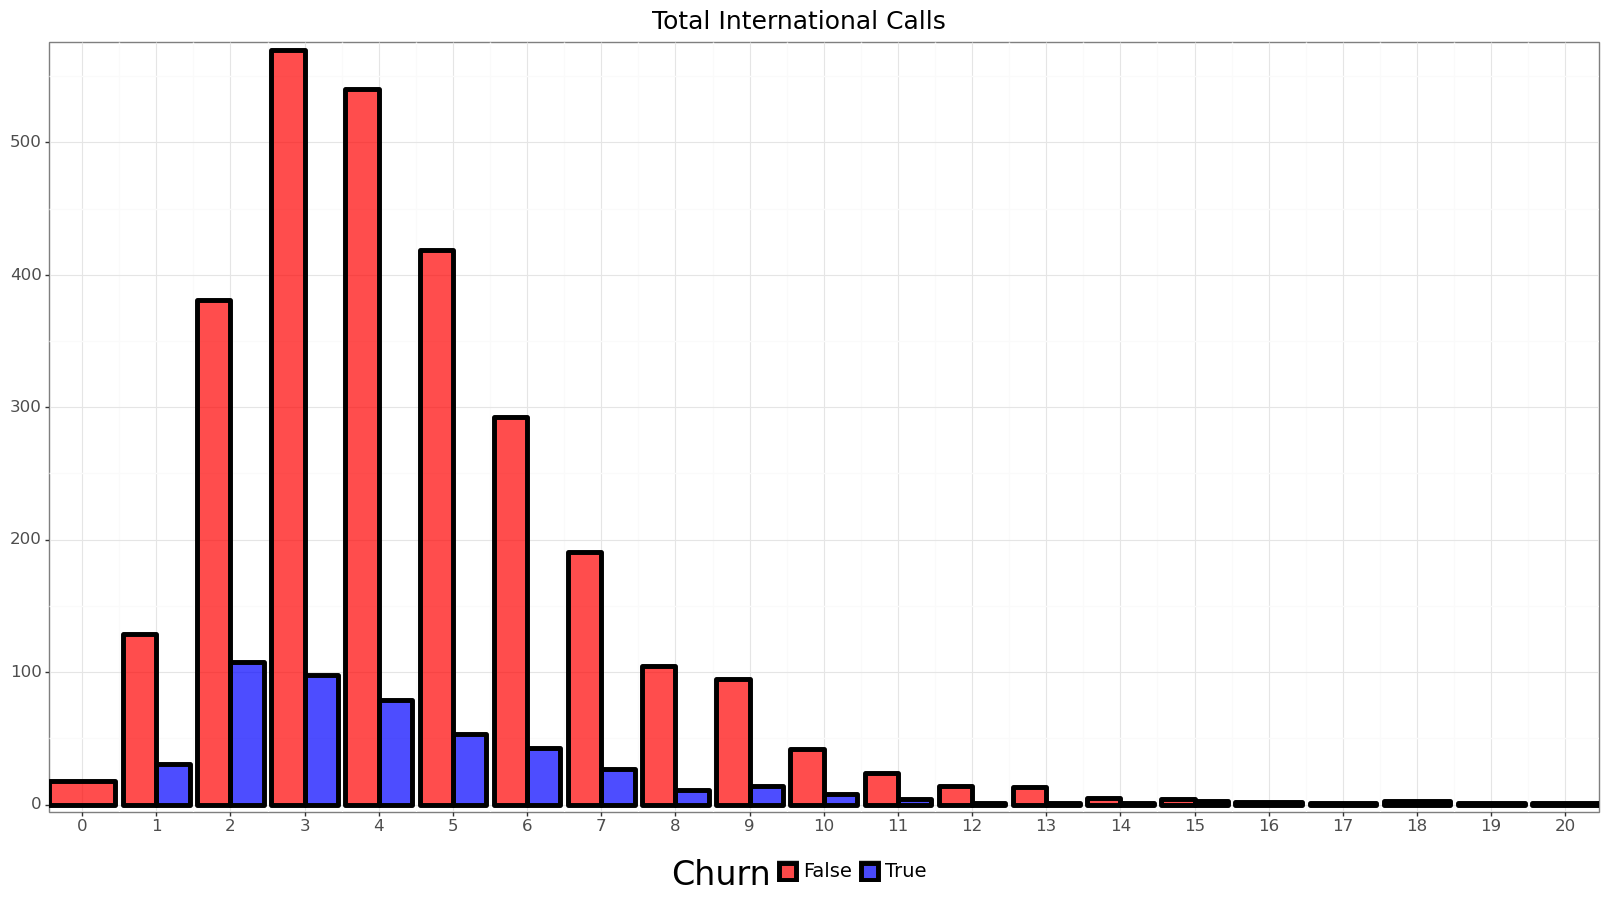

<ggplot: (122481252127)>

In [36]:
(ggplot(telecom_df, aes(x = "total_intl_calls", fill = "churn")) + 
 geom_bar(alpha = .7, position = "dodge", size = 2, color = "black") + 
 scale_x_continuous(breaks = np.arange(np.min(telecom_df.total_intl_calls), np.max(telecom_df.total_intl_calls) + 1, 1), expand = [0,  0]) + 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total International Calls", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The international calls per account has a poisson distribution. Every churned user has made at least one international call. Otherwise the distributions are pretty much identical.

### Total International Charge

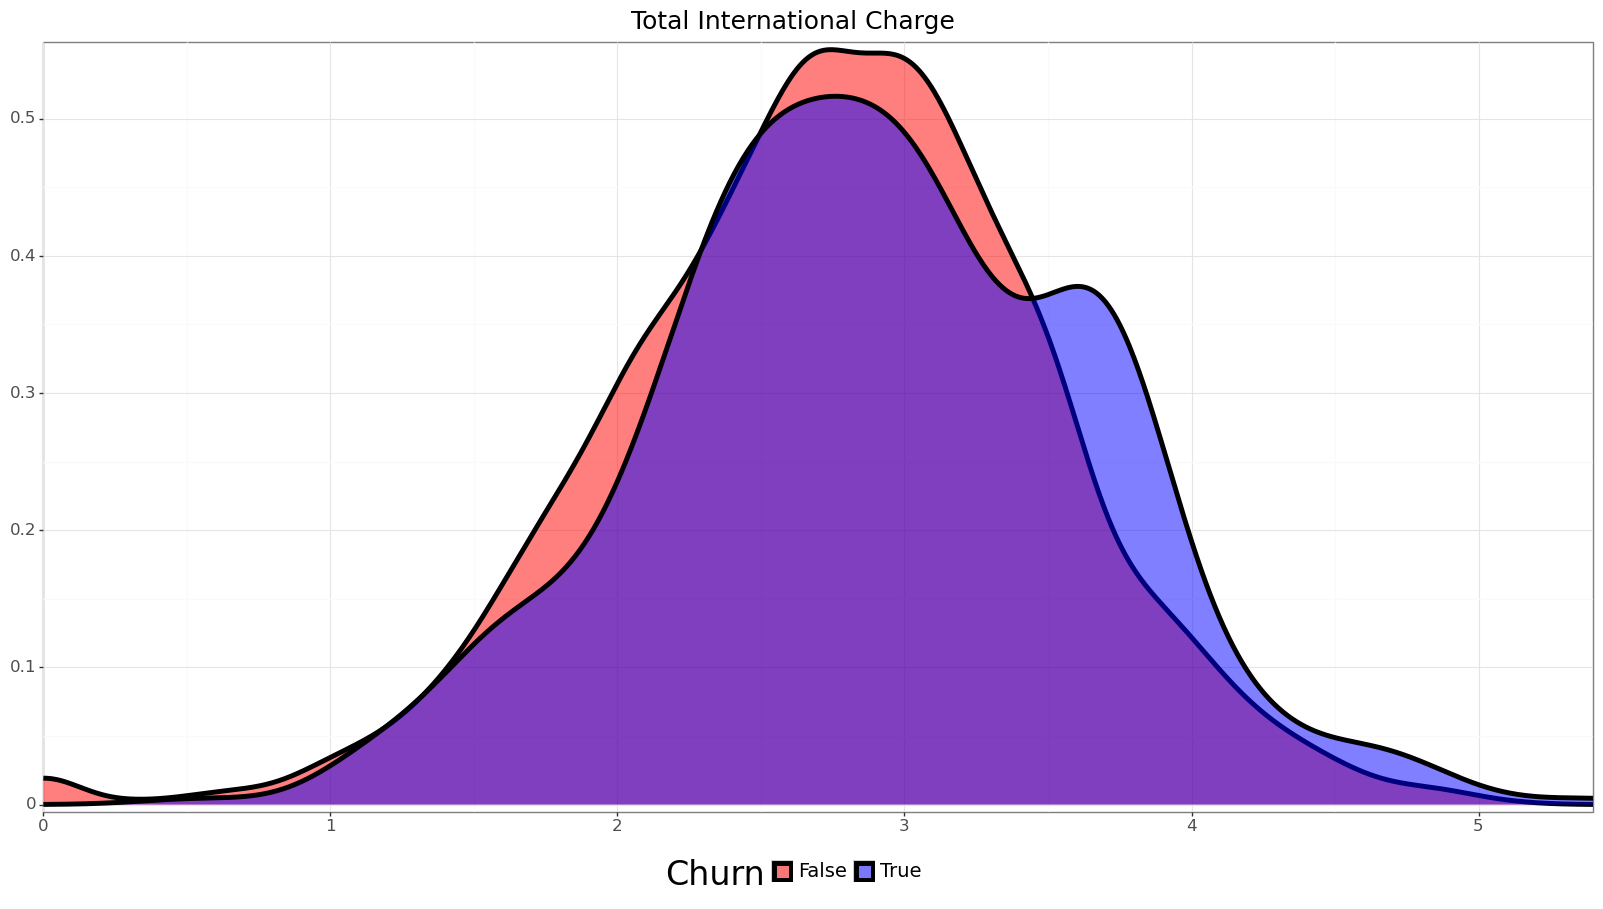

<ggplot: (122482464284)>

In [37]:
(ggplot(telecom_df, aes(x = "total_intl_charge", fill = "churn")) + 
 geom_density(alpha = .5, size = 2) + 
 scale_x_continuous(expand = [0,  0]) + 
 scale_y_continuous(expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Total International Charge", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

Distributions for both groups are Gaussian exceped the churned group has a bit ot a wider spread to the right. Churned users have a slightly higher charge.

### Customer Service Calls

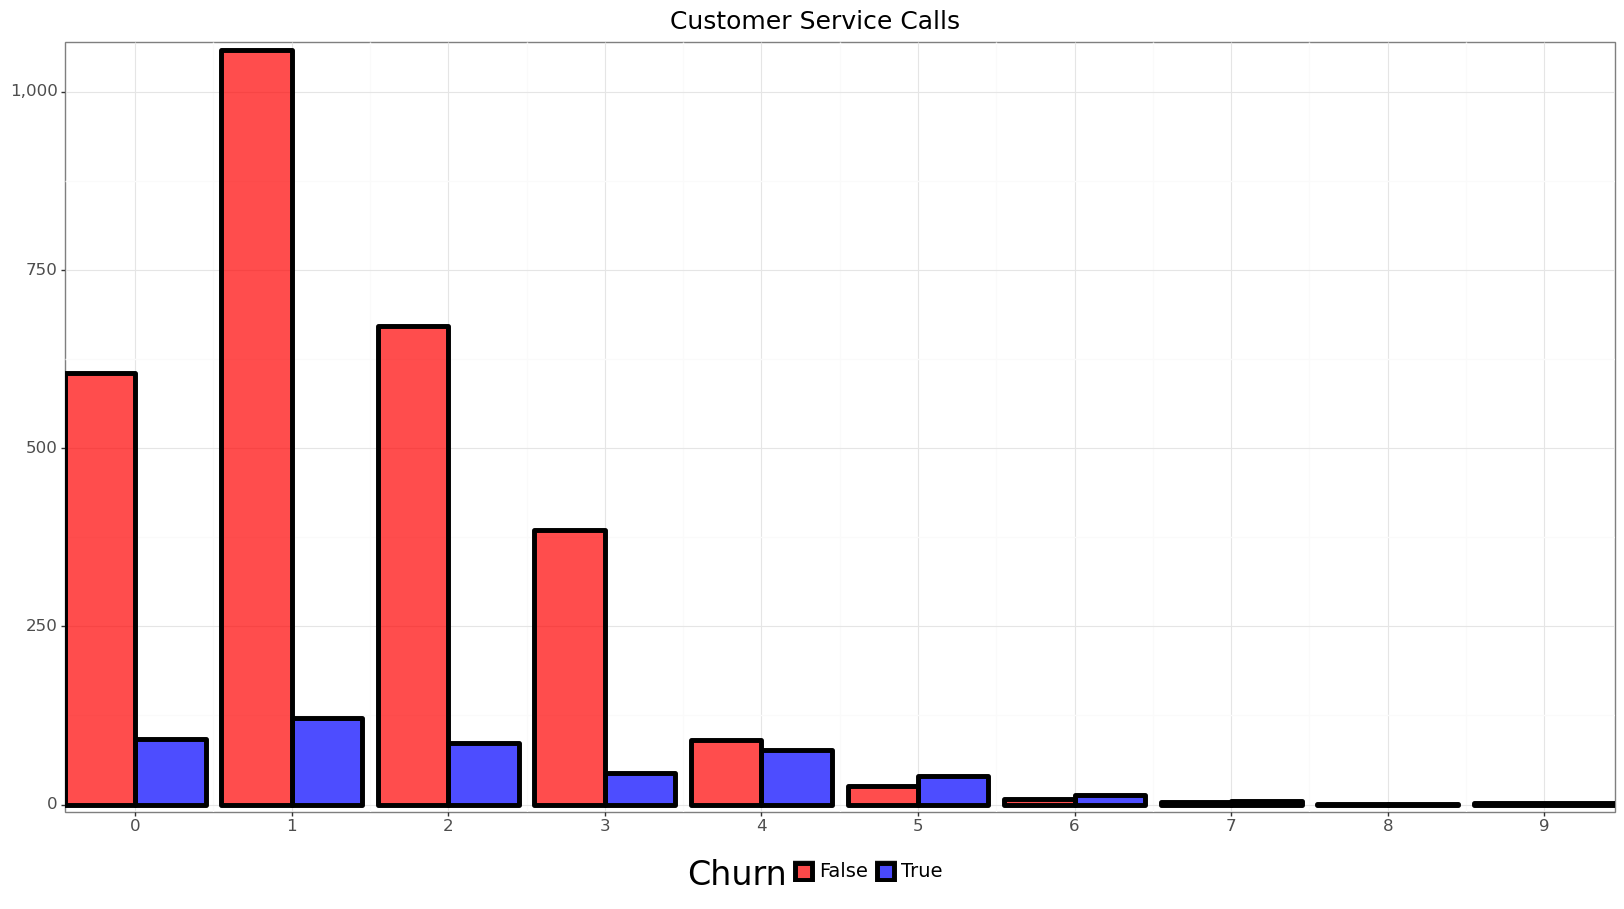

<ggplot: (122481822359)>

In [38]:
(ggplot(telecom_df, aes(x = "customer_service_calls", fill = "churn")) + 
 geom_bar(alpha = .7, position = "dodge", size = 2, color = "black") + 
 scale_x_continuous(breaks = np.arange(np.min(telecom_df.customer_service_calls), np.max(telecom_df.customer_service_calls) + 1, 1), expand = [0,  0]) + 
 scale_y_continuous(labels = comma_format(), expand = [0.01, 0]) +
 scale_fill_manual({True: "blue", False: "red"}, guide = guide_legend(reverse = True)) + 
 labs(title = "Customer Service Calls", 
      x = "", 
      y = "", 
      fill = "Churn") + 
 theme_bw() + 
 guides(fill = guide_legend(title_position = "left")) + 
 theme(axis_text = element_text(size = 12), 
       legend_position = "bottom", 
       legend_box_spacing = .2,
       legend_text = element_text(size = 14), 
       legend_title = element_text(size = 24), 
       plot_title = element_text(size = 18)))

The customer service calls per account has a poisson distribution. Retained users have far more calls between 1-3, but at 4 calls, it becomes close to 50/50 and anything more than that, the churned users are higher. **customer_service calls <= 3** is most likely a retained user, but **customer_service_calls > 3** is a tossup. 

## Summary & To Do List
* create dummy variables for **area_code**
* drop all **charge** varaibles as they overlap with minutes
* **customer_service_calls** looks like it will have high importance in modeling
* **international_plan** looks like it will have high importance in modeling